# Exploración de la data

In [11]:
# import warnings
# warnings.filterwarnings('ignore')

# import pandas as pd
# import psycopg2
# import time

# # Iniciar el cronómetro
# start_time = time.time()
 
# # Parámetros de conexión a la base de datos
# host = "172.17.139.149"
# port = 5439  
# user = "gurenab"
# password = "Redshift2023."
# dbname = "datasets"
 
# # Establecer la conexión
# conn = psycopg2.connect(
#     dbname=dbname,
#     user=user,
#     password=password,
#     host=host,
#     port=port
#  )
 
# # Consulta sql
# rawdata = pd.read_sql_query(
#                             """select
#                             *
#                             from datasets.aioperations.debtorcluster_dst
#                             where yearmonthfilternumber >= 202301;""",
#                             conn,
#                             )
 

# data = pd.DataFrame(rawdata)

# # Cerrar la conexión
# conn.close()
 
# # Detener el cronómetro
# end_time = time.time()
# # Calcular la duración total en minutos
# duration_minutes = (end_time - start_time) / 60
# print(f"tiempo de ejecución total: {duration_minutes:.2f} minutos")
# # Mostrar los datos
# display(rawdata.head())

In [15]:
# # Se guarda el dataframe en un archivo parquet para ser consumido más fácilmente

# data_11092024 = pd.DataFrame(rawdata)
# data_11092024.to_parquet('C:/Users/gurenab/Documents/Acuerdos_pago/data_11092024.parquet')

In [324]:
# Carga de la data

import warnings
warnings.filterwarnings('ignore')
import pandas as pd

data_11092024 = pd.read_parquet('C:/Users/gurenab/Documents/Acuerdos_pago/data_11092024.parquet')

In [325]:
# Configurar pandas para que no use la notación científica
pd.options.display.float_format = '{:.2f}'.format

In [326]:
# Initial information about the dataframe

display(data_11092024.describe())

,include_date,lastsalary,children,vehicules,ownerships,owberships_taxvalue,ipm,incidence,poorpeople_quantity,deprivation_intensity,...,inbound_no_effectivecalls,payment_beforemonth,account_quantity,active_accounts,inactive_accounts,untraceable_accounts,cancelled_accounts,payment_recovery,paymentamount,paymentamount_dollar
count,7034919,6169863.00,7034919.00,7034919.00,7034919.00,1513021.00,6316486.00,6316486.00,6316486.00,6316486.00,...,7034919.00,7034919,7034919.00,7034919.00,7034919.00,7034919.00,7034919.00,7034919.00,7034919.00,7034919.00
mean,2017-11-26 21:45:48.056031232,563482.07,1.56,0.63,0.26,36363723.78,0.06,0.19,27201.95,0.30,...,0.00,2018-10-20 09:44:50.530159360,1.04,0.08,0.87,0.02,0.08,0.04,3408.68,6.05
min,2012-04-02 15:38:00,25000.00,0.00,0.00,0.00,0.00,0.02,0.06,1430.00,0.28,...,0.00,2002-06-05 00:00:00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2014-11-27 14:34:00,275000.00,0.00,0.00,0.00,5160000.00,0.04,0.15,10862.00,0.29,...,0.00,2014-12-23 13:45:00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,2018-06-25 15:40:00,400000.00,1.00,0.00,0.00,17025000.00,0.06,0.18,21286.00,0.30,...,0.00,2019-03-04 16:48:00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,2021-11-09 07:21:00,675000.00,2.00,1.00,0.00,36742055.00,0.06,0.21,38137.00,0.31,...,0.00,2022-12-08 10:54:00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
max,2024-08-23 10:41:00,80100000.00,58.00,30.00,26.00,23738511920.00,0.24,0.66,71220.00,0.37,...,26.00,2024-08-31 16:06:00,9.00,5.00,9.00,5.00,3.00,1.00,105355104.75,200676.39
std,NaN,648031.57,1.57,1.01,0.58,218093279.81,0.03,0.07,21460.98,0.01,...,0.05,NaN,0.22,0.28,0.44,0.13,0.27,0.20,91362.63,164.71


In [327]:
# Duplicated values

print(data_11092024.duplicated().sum())

0


In [328]:
# Eliminar los valores duplicados 

data_11092024 = data_11092024.drop_duplicates()

In [329]:
# Valores nulos

# Identificar columnas con valores nulos y contar la cantidad de valores nulos en cada una
null_counts = data_11092024.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
null_counts = null_counts[null_counts > 0]

# Calcular el porcentaje de valores nulos
null_percentage = (null_counts / len(data_11092024)) * 100

print(null_counts)
print(null_percentage)

birthdate                              157148
datedeath                              157148
birthplace                             157148
gender                                 157148
electorallocation                      157148
jobcompany                             865056
firstperiod                            865056
firstperiodsalary                      865056
secondperiod                           865056
secondperiodsalary                     865056
lastsalary                             865056
jobtype                                865056
civilstatus                           2823201
civildate                             2823201
owberships_taxvalue                   5521898
province                               654325
canton                                 654325
district                               654325
ipm                                    718433
incidence                              718433
poorpeople_quantity                    718433
deprivation_intensity             

In [330]:
data_11092024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7034919 entries, 0 to 7034918
Data columns (total 75 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   cli_identification                  object        
 1   cli_original_code                   object        
 2   fullname                            object        
 3   accounttype                         object        
 4   countryname                         object        
 5   institutiondescription              object        
 6   alchemydescription                  object        
 7   include_date                        datetime64[ns]
 8   has_courtarchive                    bool          
 9   birthdate                           object        
 10  datedeath                           object        
 11  birthplace                          object        
 12  gender                              object        
 13  electorallocation                   object

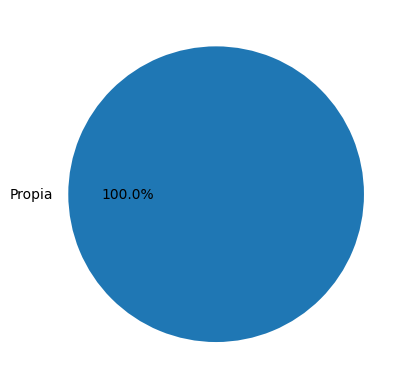

In [331]:
# accounttype

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Frecuencia de cada categoría en 'accounttype'
account_type_counts = data_11092024['accounttype'].value_counts()

# Gráfico de pastel
account_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Eliminar la etiqueta del eje y para gráficos de pastel
plt.show()

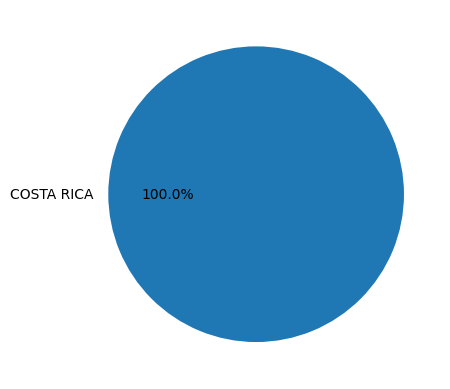

In [332]:
# countryname

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Frecuencia de cada categoría en 'countryname'
account_type_counts = data_11092024['countryname'].value_counts()

# Gráfico de pastel
account_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Eliminar la etiqueta del eje y para gráficos de pastel
plt.show()

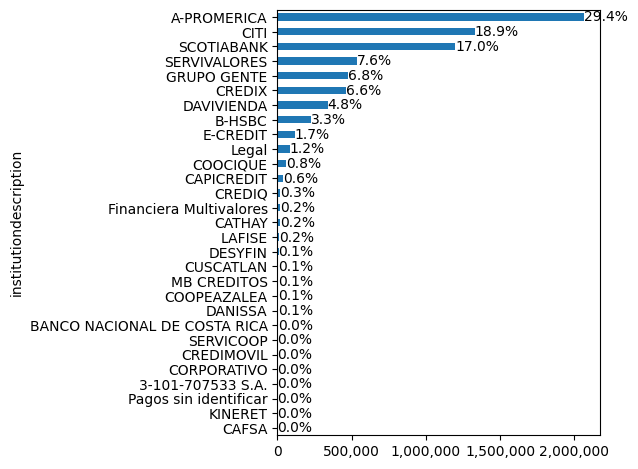

In [333]:
# institutiondescription

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Frecuencia de cada categoría en 'institutiondescription'
institutiondescription_counts = data_11092024['institutiondescription'].value_counts()

# Calcular los porcentajes de cada categoría
ins_desc_percentages = (institutiondescription_counts / institutiondescription_counts.sum()) * 100

# Gráfico de barras horizontales
fig, ax = plt.subplots()
bars = institutiondescription_counts.plot(kind='barh', ax=ax)

# Añadir etiquetas de porcentajes a la derecha de las barras
for bar, percentage in zip(bars.patches, ins_desc_percentages):
    # Obtener la posición y ancho de la barra
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    
    # Mostrar los porcentajes a la derecha de la barra
    ax.text(x + 1, y, f'{percentage:.1f}%', va='center', ha='left', fontsize=10)

# Invertir el orden para mostrar de mayor a menor en la gráfica horizontal
ax.invert_yaxis()

# Formatear el eje x para mostrar números completos en lugar de notación científica
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Ajustar el gráfico para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# alchemydescription

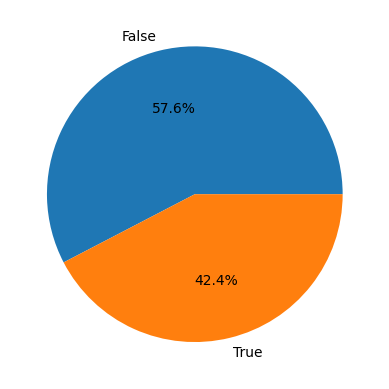

In [334]:
# has_courtarchive

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

data_11092024['has_courtarchive'] = data_11092024['has_courtarchive'].astype('object')

# Frecuencia de cada categoría en 'has_courtarchive'
has_courtarchive_counts = data_11092024['has_courtarchive'].value_counts()

# Gráfico de pastel
has_courtarchive_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Eliminar la etiqueta del eje y para gráficos de pastel
plt.show()

In [335]:
# Cálculo de la edad de los deudores

from datetime import datetime

# Cerciorarme de que la columna 'birthdate' esté en formato datetime
data_11092024['birthdate'] = pd.to_datetime(data_11092024['birthdate'])

# Función para calcular la edad a partir de birthdate
def calcular_edad(fecha_nacimiento):
    fecha_actual = datetime.now()
    edad = fecha_actual.year - fecha_nacimiento.year - ((fecha_actual.month, fecha_actual.day) < (fecha_nacimiento.month, fecha_nacimiento.day))
    return edad

# Aplicar la función calcular_edad a la columna 'birthdate_crdsrv' y guardar el resultado en una nueva columna 'age'
data_11092024['age'] = data_11092024['birthdate'].apply(calcular_edad)

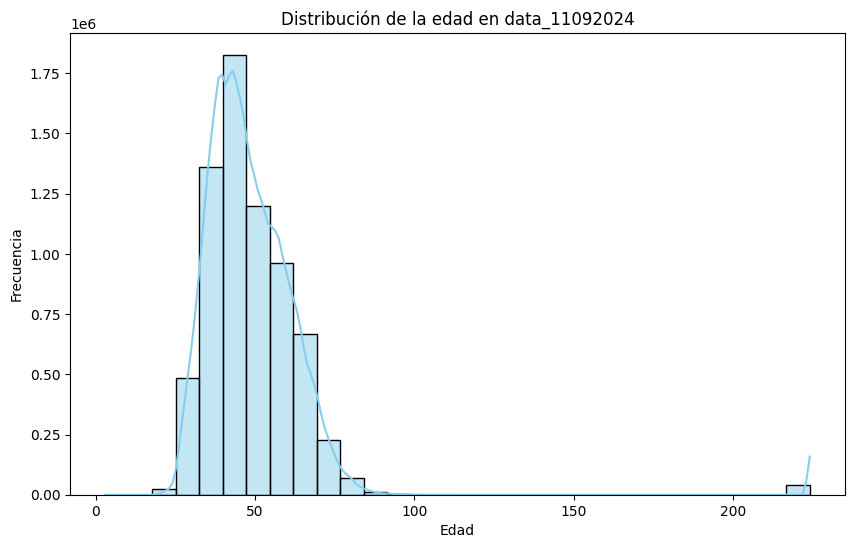

In [336]:
# Distribución de la nueva variable age

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el histograma y el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.histplot(data=data_11092024, x='age', bins=30, kde=True, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la edad en data_11092024')

plt.show()

In [337]:
# Cantidad de nulls en data_11092024['age']

#data_11092024['age'].isnull().sum()
data_11092024['age'].isnull().mean() * 100

2.2338281364717916

In [338]:
# Tal como se ve con la información anterior,hay algunos valores nulos. Ante esto, se hará un tratamiento de imputación de valores aleatorios, para que no afecte la distribución de la variable

import numpy as np
import pandas as pd
import joblib

# En primera instancia, se extraerán los nulls y los <18 años en age para imputarlos con el método numpy.

# Filtrar los valores válidos de 'age' (mayores o iguales a 18, no nulos y menores o iguales a 90)
valid_ages = data_11092024.loc[(data_11092024['age'] >= 18) & (data_11092024['age'] <= 90) & (data_11092024['age'].notnull()), 'age']

# Calcular la media y desviación estándar de los valores válidos
mean_age = valid_ages.mean()
std_age = valid_ages.std()

# Guardar los parámetros en un diccionario
imputation_params_age = {
    'mean_age': mean_age,
    'std_age': std_age
}

# Guardar el diccionario en un archivo joblib
joblib.dump(imputation_params_age, 'C:/Users/gurenab/Documents/Acuerdos_pago/imputation_params_age.pkl')

# Crear un array booleano donde los valores son True si deben ser imputados
to_impute = data_11092024['age'].isnull() | ((data_11092024['age'] < 18) | (data_11092024['age'] > 90))

# Generar valores aleatorios según una distribución normal para los casos que necesitan imputación
imputed_values = np.random.normal(loc=mean_age, scale=std_age, size=to_impute.sum())

# Asegurarse de que los valores imputados sean mayores o iguales a 18
imputed_values = np.clip(imputed_values, a_min=18, a_max=None)

# Asignar los valores imputados a los lugares correspondientes en la columna 'age'
data_11092024.loc[to_impute, 'age'] = imputed_values

print(data_11092024['age'].describe())
print(f'Cantidad de nulos en la columna "age": {data_11092024["age"].isnull().sum()}')

count   7034919.00
mean         47.83
std          11.72
min          18.00
25%          39.00
50%          46.00
75%          56.00
max          98.22
Name: age, dtype: float64
Cantidad de nulos en la columna "age": 0


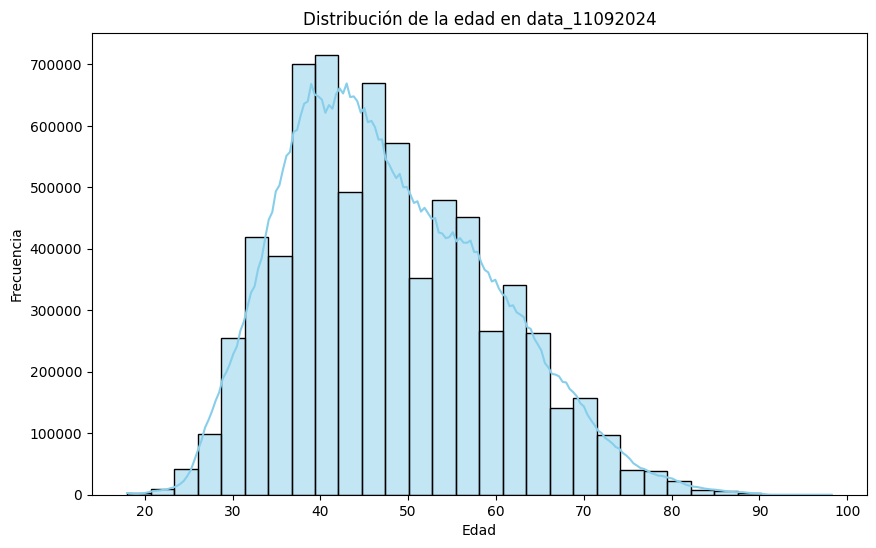

In [339]:
# Distribución de la nueva variable age

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el histograma y el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.histplot(data=data_11092024, x='age', bins=30, kde=True, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la edad en data_11092024')

plt.show()

In [340]:
# Trabajar sólo con las personas vivas; es decir, con los nulls en la variable data_11092024

# Cerciorarse de que la columna 'datedeath' esté en formato datetime
data_11092024['datedeath'] = pd.to_datetime(data_11092024['datedeath'], errors='coerce')

# Describir la columna 'datedeath' para verificar su formato y datos
print(data_11092024['datedeath'].describe())

# Filtrar los registros donde 'datedeath' es nulo (personas vivas)
personas_vivas = data_11092024[data_11092024['datedeath'].isnull()]

# Verificar el resultado
print(f"Total de registros después de filtrar personas vivas: {len(personas_vivas)}")

# Se reemplaza dataframe original con el filtrado para seguir trabajando con ese
data_11092024 = personas_vivas

count                           207048
mean     2018-08-22 19:29:11.385186048
min                1937-10-31 00:00:00
25%                2016-07-03 00:00:00
50%                2020-03-17 00:00:00
75%                2022-03-31 00:00:00
max                2024-02-01 00:00:00
Name: datedeath, dtype: object
Total de registros después de filtrar personas vivas: 6827871


In [18]:
# birthplace

# Esta variable no aporta en el análisis

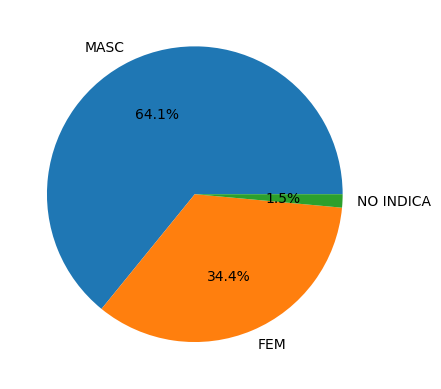

In [341]:
# gender

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Frecuencia de cada categoría en 'gender'
gender_counts = data_11092024['gender'].value_counts()

# Gráfico de pastel
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Eliminar la etiqueta del eje y para gráficos de pastel
plt.show()

In [342]:
# Imputar los missing values en gender por distribución aleatoria (para mantener las proporciones)

import numpy as np

# Obtener la distribución original de las categorías en 'gender'
gender_dist = data_11092024['gender'].value_counts(normalize=True)

# Generar valores aleatorios según la distribución original para imputar los valores faltantes
missing_gender_count = data_11092024['gender'].isnull().sum()
imputed_genders = np.random.choice(gender_dist.index, size=missing_gender_count, p=gender_dist.values)

# Asignar los valores imputados a los lugares correspondientes en la columna 'gender'
data_11092024.loc[data_11092024['gender'].isnull(), 'gender'] = imputed_genders

# Verificar el resultado
print(f"Cantidad de nulos en 'gender' después de la imputación: {data_11092024['gender'].isnull().sum()}")

Cantidad de nulos en 'gender' después de la imputación: 0


In [21]:
# electorallocation

# Esta variable no se utilizará en el análisis.

In [343]:
# jobcompany

# A partir de ella se creará otra que determine si el deudor cuenta con trabajo o no, bajo el supuesto de que si aparece None (null) es porque no tiene trabajo.

# Función para asignar los niveles según la descripción dada para la creación de una variable referente a la condición laboral
def asignar_nivel(jobcompany):
    if pd.isna(jobcompany) or jobcompany.strip() == "":
        return "SIN_TRABAJO"
    elif jobcompany == "SIN_TRABAJO":
        return "SIN_TRABAJO"
    else:
        return "CON_TRABAJO"

# Se crea una nueva columna 'jobcompany' aplicando la función asignar_nivel a la columna 'jobcompany'
data_11092024['jobcompany_status'] = data_11092024['jobcompany'].apply(asignar_nivel)

#display(data_11092024)

In [344]:
# firstperiod

display(data_11092024['firstperiod'])

0                None
1                None
2                None
3                None
6                None
              ...    
7034914    2024-06-01
7034915    2017-10-01
7034916    2023-07-01
7034917    2024-06-01
7034918    2024-02-01
Name: firstperiod, Length: 6827871, dtype: object

In [345]:
# firstperiodsalary

# Obtener los valores absolutos
value_counts = data_11092024['firstperiodsalary'].value_counts(dropna=False)

# Calcular los porcentajes
percentages = data_11092024['firstperiodsalary'].value_counts(normalize=True, dropna=False) * 100

# Combinar los valores absolutos y los porcentajes en un solo DataFrame
frequency_table = pd.DataFrame({'Absolute': value_counts, 'Percentage': percentages})

display(frequency_table)

,Absolute,Percentage
firstperiodsalary,,
None,809143,11.85
Entre ₡ 300000 y ₡ 325000,422716,6.19
Entre ₡ 325000 y ₡ 350000,394173,5.77
Entre ₡ 275000 y ₡ 300000,378022,5.54
Entre ₡ 225000 y ₡ 250000,351780,5.15
...,...,...
Entre ₡ 11125000 y ₡ 11150000,17,0.00
Entre ₡ 12175000 y ₡ 12200000,17,0.00
Entre ₡ 11150000 y ₡ 11175000,13,0.00


In [346]:
# secondperiod

display(data_11092024['secondperiod'])

0                None
1                None
2                None
3                None
6                None
              ...    
7034914    2024-07-01
7034915    2019-12-01
7034916    2023-07-01
7034917    2024-07-01
7034918    2024-07-01
Name: secondperiod, Length: 6827871, dtype: object

In [347]:
# secondperiodsalary

# Obtener los valores absolutos
value_counts = data_11092024['secondperiodsalary'].value_counts(dropna=False)

# Calcular los porcentajes
percentages = data_11092024['secondperiodsalary'].value_counts(normalize=True, dropna=False) * 100

# Combinar los valores absolutos y los porcentajes en un solo DataFrame
frequency_table = pd.DataFrame({'Absolute': value_counts, 'Percentage': percentages})

display(frequency_table)

,Absolute,Percentage
secondperiodsalary,,
None,809143,11.85
Entre ₡ 325000 y ₡ 350000,470096,6.88
Entre ₡ 300000 y ₡ 325000,297029,4.35
Entre ₡ 375000 y ₡ 400000,273379,4.00
Entre ₡ 350000 y ₡ 375000,249548,3.65
...,...,...
Entre ₡ 10625000 y ₡ 10650000,12,0.00
Entre ₡ 7550000 y ₡ 7575000,10,0.00
Entre ₡ 15400000 y ₡ 15425000,8,0.00


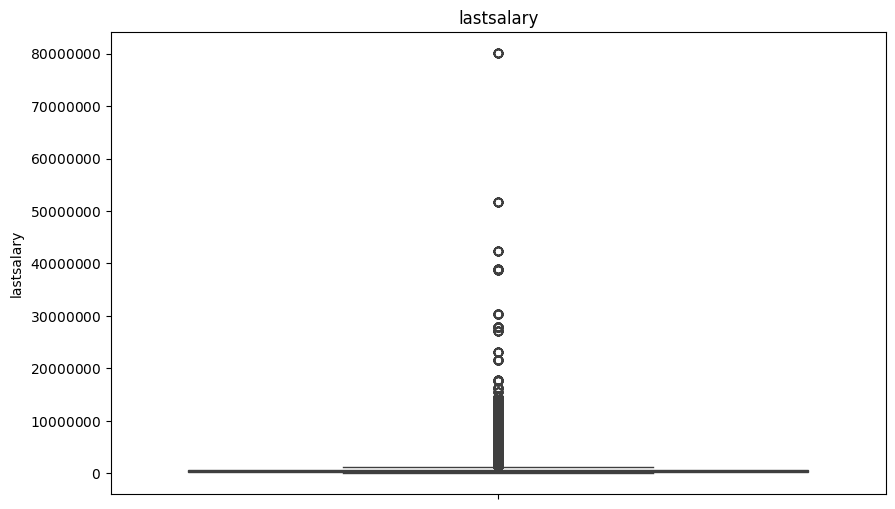

In [348]:
# lastsalary

# Ajuste de la columna a tipo numérica
data_11092024['lastsalary'] = pd.to_numeric(data_11092024['lastsalary'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='lastsalary', data=data_11092024[['lastsalary']])
plt.title('lastsalary')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

In [349]:
print(data_11092024['lastsalary'].describe())

count    6018728.00
mean      567920.40
std       649576.05
min        25000.00
25%       275000.00
50%       400000.00
75%       675000.00
max     80100000.00
Name: lastsalary, dtype: float64


In [350]:
# Tratamiento de outliers en data_11092024['lastsalary']

# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1_lastsalary = data_11092024['lastsalary'].quantile(0.25)
Q3_lastsalary = data_11092024['lastsalary'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR_lastsalary = Q3_lastsalary - Q1_lastsalary

# Definir límites para los outliers
lower_bound = Q1_lastsalary - 3 * IQR_lastsalary
upper_bound = Q3_lastsalary + 3 * IQR_lastsalary

# Filtrar los outliers
data_copy1 = data_11092024[(data_11092024['lastsalary'] >= lower_bound) & (data_11092024['lastsalary'] <= upper_bound)]

# Calcular la media y desviación estándar de los valores válidos
mean_lastsalary = data_copy1['lastsalary'].mean()
std_lastsalary = data_copy1['lastsalary'].std()

# Guardar los parámetros en un diccionario
imputation_params_lastsalary = {
    'mean_lastsalary': mean_lastsalary,
    'std_lastsalary': std_lastsalary,
    'Q1_lastsalary': Q1_lastsalary,
    'Q3_lastsalary': Q3_lastsalary,
    'IQR_lastsalary': IQR_lastsalary
}

# Guardar el diccionario en un archivo joblib
joblib.dump(imputation_params_lastsalary, 'imputation_params_lastsalary.pkl')

# Calcular el porcentaje de datos restantes
percentage_remaining = (len(data_copy1) / len(data_11092024)) * 100

# Verificar la eliminación de outliers
print(data_copy1['lastsalary'].describe())
print(f"Cantidad original de filas: {len(data_11092024)}")
print(f"Cantidad de filas después de eliminar outliers: {len(data_copy1)}")
print(f"Porcentaje de datos restantes: {percentage_remaining:.2f}%")

# Al realizar el tratamiento de outliers en esta variable, se eliminaron los que habían en firstperiodsalary y secondperiodsalary.

count   5828249.00
mean     490794.17
std      358297.61
min       25000.00
25%      275000.00
50%      400000.00
75%      625000.00
max     1875000.00
Name: lastsalary, dtype: float64
Cantidad original de filas: 6827871
Cantidad de filas después de eliminar outliers: 5828249
Porcentaje de datos restantes: 85.36%


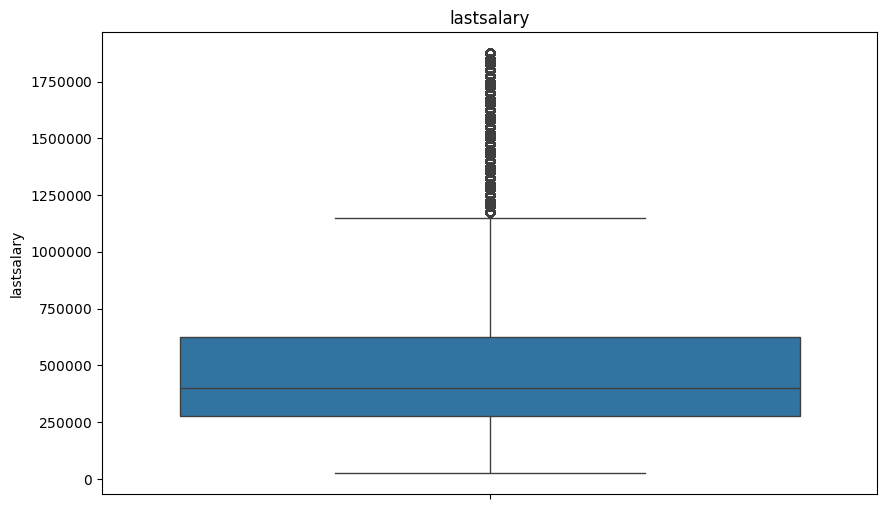

In [351]:
# Distribución de lastsalary

# Ajuste de la columna a tipo numérica
data_copy1['lastsalary'] = pd.to_numeric(data_copy1['lastsalary'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='lastsalary', data=data_copy1)
plt.title('lastsalary')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

In [352]:
# jobtype

data_copy1['jobtype'].value_counts(dropna=False)

jobtype
PRIVADO    4172520
PROPIO      965897
PUBLICO     689832
Name: count, dtype: int64

In [353]:
# civilstatus

data_copy1['civilstatus'].value_counts(dropna=False)

civilstatus
MATRIMONIO                      2315645
None                            2227095
DIVORCIO                        1175209
VIUDEZ                            55136
NO CONOCIDO                       52107
SEPARACION JUDICIAL                3015
RECONCILIACOacute;N JUDICIAL         42
Name: count, dtype: int64

In [354]:
# Recodificación de la variable civilstatus. En el caso de aquellos con None, se hizo una revisión de algunos y son personas solteras, por lo que se les asigna ese valor

# Definición del diccionario de reemplazo
replacement_dict = {
    None: 'SOLTERO',
    'NO CONOCIDO': 'NO_CONOCIDO',
    'SEPARACION JUDICIAL': 'SEPARACION_JUDICIAL',
    'RECONCILIACOacute;N JUDICIAL': 'RECONCILIACION_JUDICIAL'
}

# Reemplazar los valores en la columna 'civilstatus'
data_copy1['civilstatus'] = data_copy1['civilstatus'].replace(replacement_dict)

# Asegurarse de que todos los casos de "None" se reemplazan por "SOLTERO"
data_copy1['civilstatus'] = data_copy1['civilstatus'].fillna('SOLTERO')

# Frecuencias de la variable civilstatus recodificada
data_copy1['civilstatus'].value_counts(dropna=False)

civilstatus
MATRIMONIO                 2315645
SOLTERO                    2227095
DIVORCIO                   1175209
VIUDEZ                       55136
NO_CONOCIDO                  52107
SEPARACION_JUDICIAL           3015
RECONCILIACION_JUDICIAL         42
Name: count, dtype: int64

In [355]:
# civildate

display(data_copy1['civildate'])

# Esta variable no aporta en el análisis, por lo cual no se usará.

12         2004-02-18
15         1965-02-20
17         2007-03-03
25         2009-04-14
27         1976-03-18
              ...    
7034914    2018-05-24
7034915          None
7034916          None
7034917          None
7034918          None
Name: civildate, Length: 5828249, dtype: object

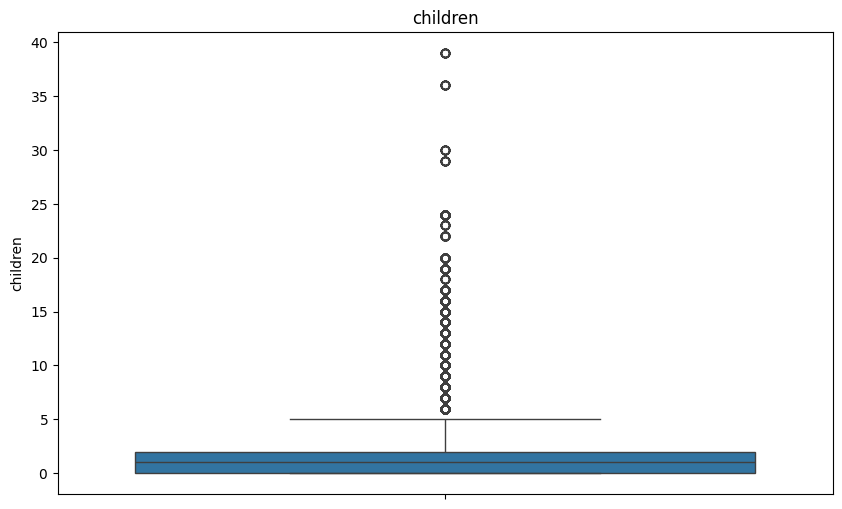

In [356]:
# children

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='children', data=data_copy1[['children']])
plt.title('children')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

In [357]:
# Debido al comportamiento de la variable children (casos con una cantidad de hijos muy grande), por el momento se manejará con dummies

# Crear una nueva columna categórica basada en las condiciones especificadas
data_copy1['children'] = pd.cut(
    data_copy1['children'],
    bins=[-1, 0, float('inf')],
    labels=['sin_hijos', 'con_hijos'],
    right=True
)

# Reemplazar los valores nulos con 'desconocido'
data_copy1['children'] = data_copy1['children'].cat.add_categories(['desconocido'])
data_copy1['children'] = data_copy1['children'].fillna('desconocido')

# Convertir la columna categórica en variables dummy con el prefijo 'children'
dummies = pd.get_dummies(data_copy1['children'], prefix='children', dtype=int)

# Unir las variables dummy con el dataframe original
data_copy1 = pd.concat([data_copy1, dummies], axis=1)

#display(data_copy1)

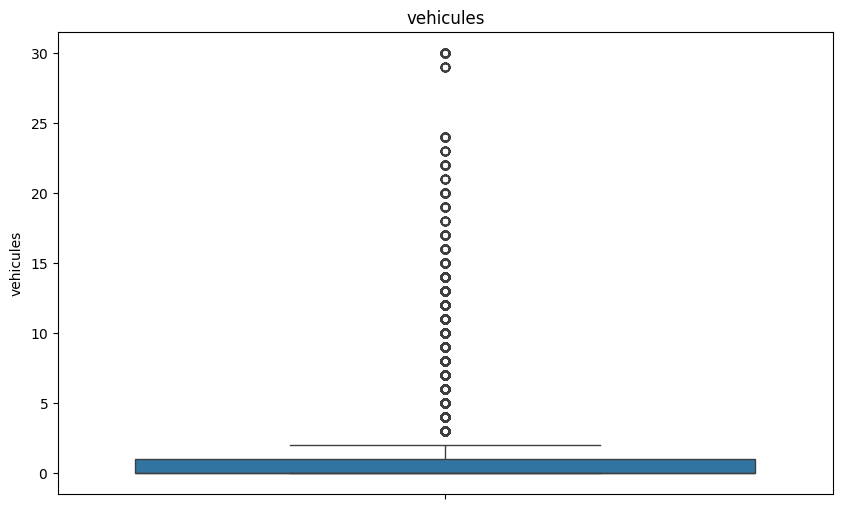

In [358]:
# vehicules

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='vehicules', data=data_copy1[['vehicules']])
plt.title('vehicules')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

In [359]:
# Debido al comportamiento de la variable vehicules (casos con una cantidad de carros muy grande), por el momento se manejará con dummies

# Crear una nueva columna categórica basada en las condiciones especificadas
data_copy1['vehicules'] = pd.cut(
    data_copy1['vehicules'],
    bins=[-1, 0, float('inf')],
    labels=['sin_carros', 'con_carros'],
    right=True
)

# Reemplazar los valores nulos con 'desconocido'
data_copy1['vehicules'] = data_copy1['vehicules'].cat.add_categories(['desconocido'])
data_copy1['vehicules'] = data_copy1['vehicules'].fillna('desconocido')

# Convertir la columna categórica en variables dummy con el prefijo 'vehicules'
dummies = pd.get_dummies(data_copy1['vehicules'], prefix='vehicules', dtype=int)

# Unir las variables dummy con el dataframe original
data_copy1 = pd.concat([data_copy1, dummies], axis=1)

#display(data_copy1)

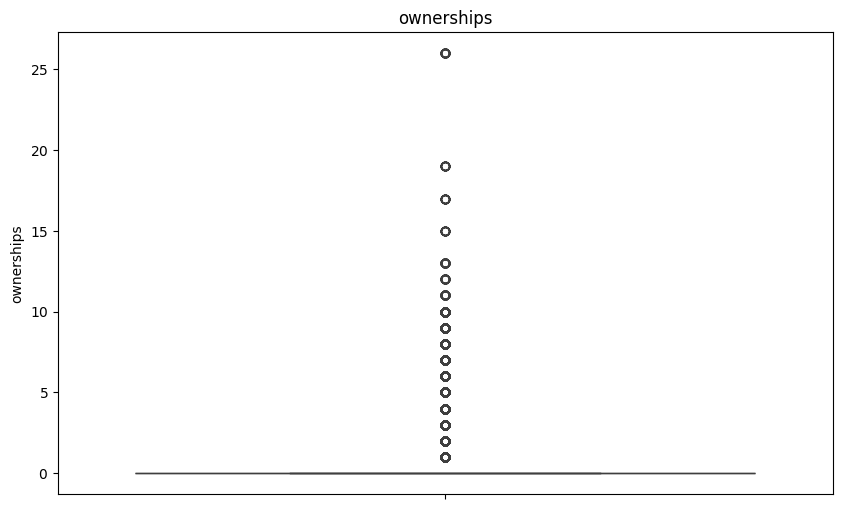

In [360]:
# ownerships

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='ownerships', data=data_copy1[['ownerships']])
plt.title('ownerships')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

In [361]:
# Debido al comportamiento de la variable ownerships (casos con una cantidad de propiedades muy grande), por el momento se manejará con dummies

# Crear una nueva columna categórica basada en las condiciones especificadas
data_copy1['ownerships'] = pd.cut(
    data_copy1['ownerships'],
    bins=[-1, 0, float('inf')],
    labels=['sin_propiedades', 'con_propiedades'],
    right=True
)

# Reemplazar los valores nulos con 'desconocido'
data_copy1['ownerships'] = data_copy1['ownerships'].cat.add_categories(['desconocido'])
data_copy1['ownerships'] = data_copy1['ownerships'].fillna('desconocido')

# Convertir la columna categórica en variables dummy con el prefijo 'ownerships'
dummies = pd.get_dummies(data_copy1['ownerships'], prefix='ownerships', dtype=int)

# Unir las variables dummy con el dataframe original
data_copy1 = pd.concat([data_copy1, dummies], axis=1)

#display(data_copy1)

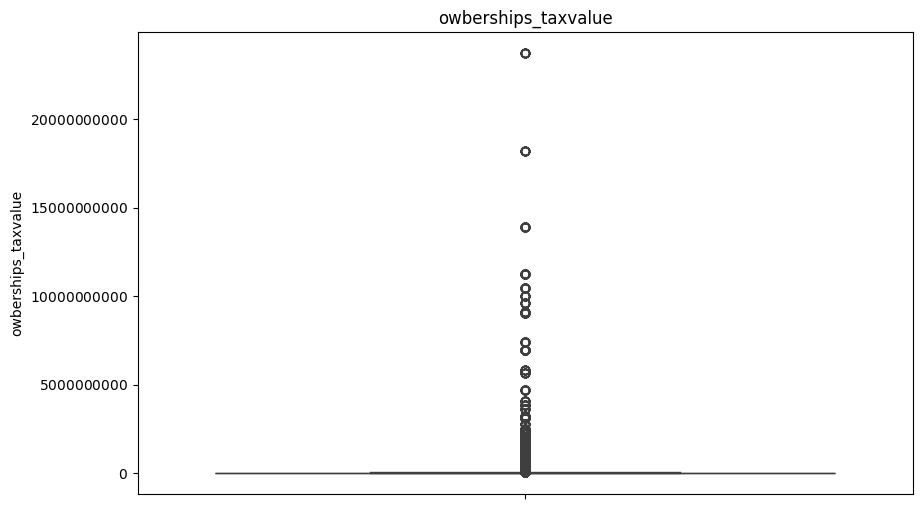

In [362]:
# owberships_taxvalue

# Ajuste de la columna a tipo numérica
data_copy1['owberships_taxvalue'] = pd.to_numeric(data_copy1['owberships_taxvalue'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='owberships_taxvalue', data=data_copy1[['owberships_taxvalue']])
plt.title('owberships_taxvalue')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

# Esta variable no me aporta al análisis.

In [363]:
# province

# Obtener los valores absolutos
value_counts = data_copy1['province'].value_counts(dropna=False)

# Calcular los porcentajes
percentages = data_copy1['province'].value_counts(normalize=True, dropna=False) * 100

# Combinar los valores absolutos y los porcentajes en un solo dataframe
frequency_table = pd.DataFrame({'Absolute': value_counts, 'Percentage': percentages})

display(frequency_table)

,Absolute,Percentage
province,,
SAN JOSE,2576430,44.21
ALAJUELA,868795,14.91
HEREDIA,690806,11.85
CARTAGO,642273,11.02
LIMON,326981,5.61
GUANACASTE,313609,5.38
PUNTARENAS,310787,5.33
None,57390,0.98
CONSULADO,41178,0.71


In [364]:
# Aseguramiento de que 'province' es de tipo categórico
data_copy1['province'] = data_copy1['province'].astype('category')

# Agregar la categoría 'desconocido'
data_copy1['province'] = data_copy1['province'].cat.add_categories(['desconocido'])

# Rellenar los valores nulos con 'desconocido'
data_copy1['province'] = data_copy1['province'].fillna('desconocido')

# Convertir la columna categórica en variables dummy con el prefijo 'province'
province_dummies = pd.get_dummies(data_copy1['province'], dtype=int, prefix='province')

# Unir las variables dummy al dataframe original
data_copy1 = pd.concat([data_copy1, province_dummies], axis=1)

#display(data_copy1)

In [365]:
# canton

# Obtener los valores absolutos
value_counts = data_copy1['canton'].value_counts(dropna=False)

# Calcular los porcentajes
percentages = data_copy1['canton'].value_counts(normalize=True, dropna=False) * 100

# Combinar los valores absolutos y los porcentajes en un solo dataframe
frequency_table = pd.DataFrame({'Absolute': value_counts, 'Percentage': percentages})

display(frequency_table)

,Absolute,Percentage
canton,,
CENTRAL,1710538,29.35
DESAMPARADOS,421424,7.23
GOICOECHEA,255865,4.39
LA UNION,175151,3.01
TIBAS,163636,2.81
...,...,...
BOLIVIA,59,0.00
JAPON,42,0.00
SINGAPUR,42,0.00


In [366]:
# Aseguramiento de que 'canton' es de tipo categórico
data_copy1['canton'] = data_copy1['canton'].astype('category')

# Agregar la categoría 'desconocido'
data_copy1['canton'] = data_copy1['canton'].cat.add_categories(['desconocido'])

# Rellenar los valores nulos con 'desconocido'
data_copy1['canton'] = data_copy1['canton'].fillna('desconocido')

# Cantidad de nulls en data_copy1['canton']
data_copy1['canton'].isnull().mean() * 100

0.0

In [367]:
# Frecuencias de la variable 'district'

# Obtener los valores absolutos
value_counts = data_copy1['district'].value_counts(dropna=False)

# Calcular los porcentajes
percentages = data_copy1['district'].value_counts(normalize=True, dropna=False) * 100

# Combinar los valores absolutos y los porcentajes en un solo dataframe
frequency_table = pd.DataFrame({'Absolute': value_counts, 'Percentage': percentages})

display(frequency_table)

,Absolute,Percentage
district,,
SAN ANTONIO,127507,2.19
SAN RAFAEL,124417,2.13
SAN VICENTE,71999,1.24
SAN JUAN,70480,1.21
SAN FRANCISCO,70183,1.20
...,...,...
QUEBRADA ARROYO,8,0.00
ALTO PACUARE ABAJO (JEKUI),7,0.00
SAN VICENTE UPIAV-2,6,0.00


In [368]:
# Aseguramiento de que 'district' es de tipo categórico
data_copy1['district'] = data_copy1['district'].astype('category')

# Agregar la categoría 'desconocido'
data_copy1['district'] = data_copy1['district'].cat.add_categories(['desconocido'])

# Rellenar los valores nulos con 'desconocido'
data_copy1['district'] = data_copy1['district'].fillna('desconocido')

# Cantidad de nulls en data_copy1['district']
data_copy1['district'].isnull().mean() * 100

0.0

In [369]:
# ipm, incidence, poorpeople_quantity, deprivation_intensity, severity, vulnerability, inequality,
# contribution_deprivation_education, contribution_deprivation_dwelling, 
# contribution_deprivation_health, contribution_deprivation_social, population, idgas

# Lista de variables que deseas imputar
variables = [
    'ipm', 'incidence', 'poorpeople_quantity', 'deprivation_intensity', 'severity', 
    'vulnerability', 'inequality', 'contribution_deprivation_education', 
    'contribution_deprivation_dwelling', 'contribution_deprivation_health', 
    'contribution_deprivation_social', 'population', 'idgas'
]

# Imputar valores faltantes con la media de cada columna
for var in variables:
    mean_value = data_copy1[var].mean()  # Calcular la media de cada variable
    data_copy1[var].fillna(mean_value, inplace=True)  # Imputar los NaN con la media

# Verificar que los valores faltantes fueron imputados
describe_df = data_copy1[variables].describe()
print(describe_df)

             ipm  incidence  poorpeople_quantity  deprivation_intensity  \
count 5828249.00 5828249.00           5828249.00             5828249.00   
mean        0.06       0.19             27274.35                   0.30   
std         0.03       0.07             21252.04                   0.01   
min         0.02       0.06              1430.00                   0.28   
25%         0.04       0.15             10862.00                   0.29   
50%         0.06       0.19             21286.00                   0.30   
75%         0.06       0.21             38137.00                   0.31   
max         0.24       0.66             71220.00                   0.37   

        severity  vulnerability  inequality  \
count 5828249.00     5828249.00  5828249.00   
mean        0.01           0.16        0.01   
std         0.01           0.04        0.00   
min         0.00           0.06        0.00   
25%         0.00           0.14        0.00   
50%         0.01           0.15        0.0

In [383]:
# ibm_women, ibm_men,
# iev_women, iev_men,
# ic_women, ic_men,
# expected_women, expected_men
# schooling_women, schooling_men

def imputar_media_genero_canton(df):
    # Iteramos por cada columna que tiene valores por género
    for column in ['ibm', 'iev', 'ic', 'expected', 'schooling']:
        women_column = f'{column}_women'
        men_column = f'{column}_men'
        
        # Agrupamos por cantón y género para obtener la media en cada grupo
        media_women_canton = df.groupby('canton')[women_column].transform('mean')
        media_men_canton = df.groupby('canton')[men_column].transform('mean')
        
        # Media nacional (sin distinción de cantón, solo por género)
        media_nacional_women = df.groupby('gender')[women_column].transform('mean')
        media_nacional_men = df.groupby('gender')[men_column].transform('mean')

        # Media general sin distinción de género (en todo el dataset)
        mean_general_women = df[women_column].mean()
        mean_general_men = df[men_column].mean()
        mean_general = df[[women_column, men_column]].mean().mean()  # Media sin distinción de género

        # Imputar valores faltantes en columnas de mujeres (para gender FEM)
        df.loc[(df['gender'] == 'FEM') & (df[women_column].isna()), women_column] = media_women_canton
        df.loc[(df['gender'] == 'FEM') & (df[women_column].isna()) & (df['canton'] == 'desconocido'), women_column] = media_nacional_women
        df.loc[(df['gender'] == 'FEM') & (df[women_column].isna()) & (df['province'] == 'CONSULADO'), women_column] = media_nacional_women

        # Imputar valores faltantes en columnas de hombres (para gender FEM)
        df.loc[(df['gender'] == 'FEM') & (df[men_column].isna()), men_column] = media_men_canton
        df.loc[(df['gender'] == 'FEM') & (df[men_column].isna()) & (df['canton'] == 'desconocido'), men_column] = media_nacional_men
        df.loc[(df['gender'] == 'FEM') & (df[men_column].isna()) & (df['province'] == 'CONSULADO'), men_column] = media_nacional_men

        # Imputar valores faltantes en columnas de hombres (para gender MASC)
        df.loc[(df['gender'] == 'MASC') & (df[men_column].isna()), men_column] = media_men_canton
        df.loc[(df['gender'] == 'MASC') & (df[men_column].isna()) & (df['canton'] == 'desconocido'), men_column] = media_nacional_men
        df.loc[(df['gender'] == 'MASC') & (df[men_column].isna()) & (df['province'] == 'CONSULADO'), men_column] = media_nacional_men

        # Imputar valores faltantes en columnas de mujeres (para gender MASC)
        df.loc[(df['gender'] == 'MASC') & (df[women_column].isna()), women_column] = media_women_canton
        df.loc[(df['gender'] == 'MASC') & (df[women_column].isna()) & (df['canton'] == 'desconocido'), women_column] = media_nacional_women
        df.loc[(df['gender'] == 'MASC') & (df[women_column].isna()) & (df['province'] == 'CONSULADO'), women_column] = media_nacional_women
        
        # Si el género es "NO INDICA", se usa la media sin distinción de género, incluso para cantón 'desconocido' o 'CONSULADO'
        df.loc[(df['gender'] == 'NO INDICA') & (df[women_column].isna()), women_column] = mean_general
        df.loc[(df['gender'] == 'NO INDICA') & (df[men_column].isna()), men_column] = mean_general

    return df

# Se aplica la función
data_copy1 = imputar_media_genero_canton(data_copy1)

In [ ]:
display(data_copy1)

In [384]:
# Asignar valores basados en el género de las siguientes variables:

# Convertir las columnas a tipo float
columns_to_convert = [
    'ibm_women', 'ibm_men', 'iev_women', 'iev_men', 
    'ic_women', 'ic_men', 'expected_women', 'expected_men', 
    'schooling_women', 'schooling_men'
]

for column in columns_to_convert:
    data_copy1[column] = data_copy1[column].astype(float)

# Asignar valores basados en el género
data_copy1['ibm'] = np.where(data_copy1['gender'] == 'FEM', data_copy1['ibm_women'], np.where(data_copy1['gender'] == 'MASC', data_copy1['ibm_men'], np.nan))
data_copy1['iev'] = np.where(data_copy1['gender'] == 'FEM', data_copy1['iev_women'], np.where(data_copy1['gender'] == 'MASC', data_copy1['iev_men'], np.nan))
data_copy1['ic'] = np.where(data_copy1['gender'] == 'FEM', data_copy1['ic_women'], np.where(data_copy1['gender'] == 'MASC', data_copy1['ic_men'], np.nan))
data_copy1['expected'] = np.where(data_copy1['gender'] == 'FEM', data_copy1['expected_women'], np.where(data_copy1['gender'] == 'MASC', data_copy1['expected_men'], np.nan))
data_copy1['schooling'] = np.where(data_copy1['gender'] == 'FEM', data_copy1['schooling_women'], np.where(data_copy1['gender'] == 'MASC', data_copy1['schooling_men'], np.nan))

In [ ]:
# yearmonthfilternumber

# No voy a utilizar esta variable, es la fecha compuesta

In [ ]:
# year

In [ ]:
# month

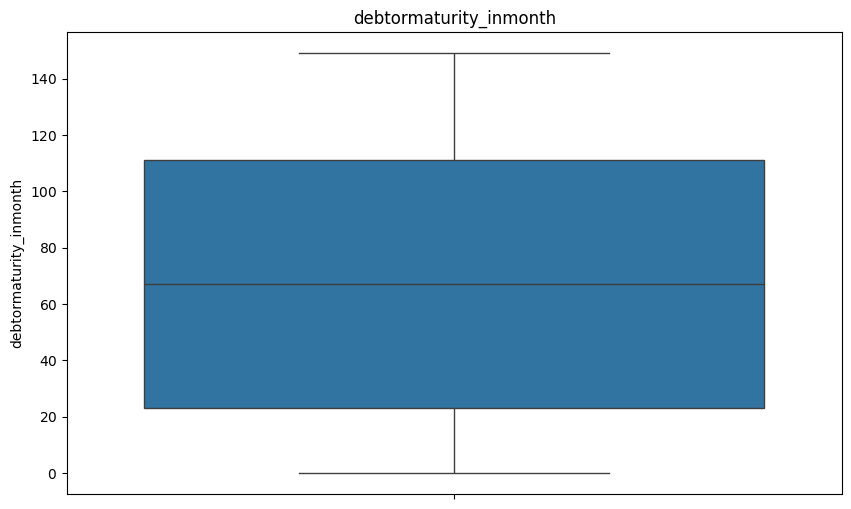

In [385]:
# debtormaturity_inmonth

# Ajuste de la columna a tipo numérica
data_copy1['debtormaturity_inmonth'] = pd.to_numeric(data_copy1['debtormaturity_inmonth'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='debtormaturity_inmonth', data=data_copy1[['debtormaturity_inmonth']])
plt.title('debtormaturity_inmonth')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

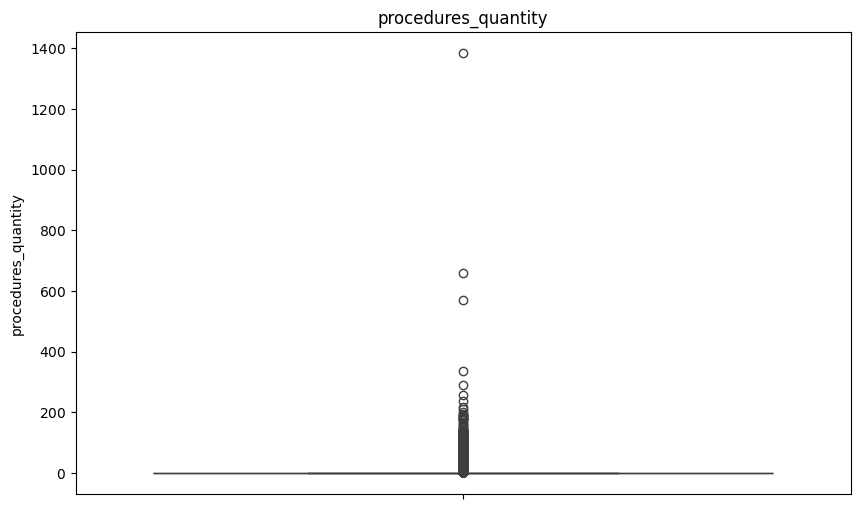

In [386]:
# procedures_quantity

# Ajuste de la columna a tipo numérica
data_copy1['procedures_quantity'] = pd.to_numeric(data_copy1['procedures_quantity'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='procedures_quantity', data=data_copy1[['procedures_quantity']])
plt.title('procedures_quantity')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

In [387]:
print(data_copy1['procedures_quantity'].describe())

count   5828249.00
mean          1.22
std           2.98
min           0.00
25%           0.00
50%           1.00
75%           1.00
max        1384.00
Name: procedures_quantity, dtype: float64


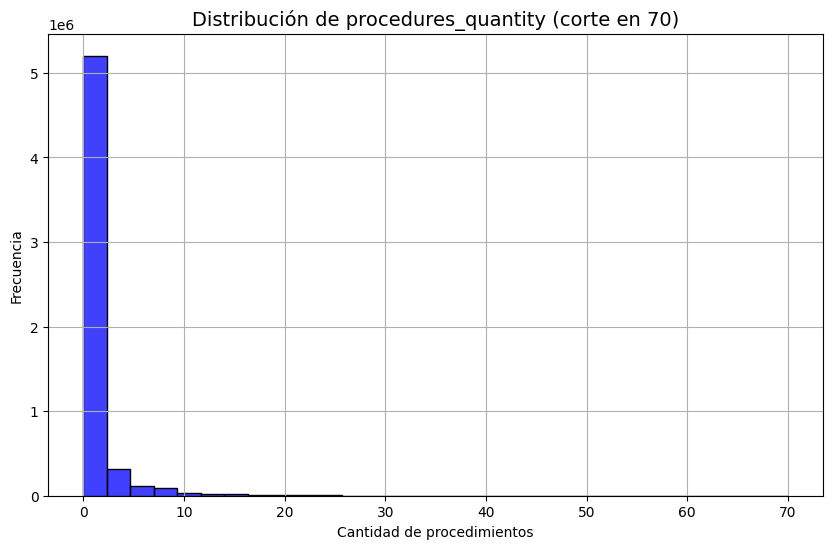

In [388]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los valores para mostrar solo aquellos menores o iguales a 70
filtered_data = data_copy1[data_copy1['procedures_quantity'] <= 70]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['procedures_quantity'], bins=30, kde=False, color='blue')

# Añadir etiquetas y título
plt.title('Distribución de procedures_quantity (corte en 70)', fontsize=14)
plt.xlabel('Cantidad de procedimientos')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el gráfico
plt.show()

Text(0.5, 1.0, 'Distribución de procedures_quantity en data_copy1')

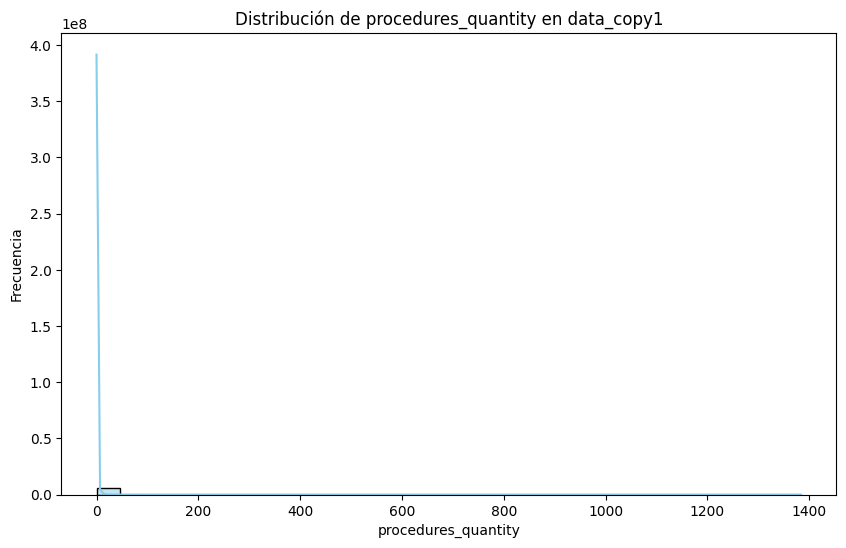

In [389]:
# Distribución de la nueva variable procedures_quantity

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el histograma y el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.histplot(data=data_copy1, x='procedures_quantity', bins=30, kde=True, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('procedures_quantity')
plt.ylabel('Frecuencia')
plt.title('Distribución de procedures_quantity en data_copy1')

In [390]:
# Transformación logarítmica

import numpy as np
data_copy1['log_procedures_quantity'] = np.log1p(data_copy1['procedures_quantity'])  # Log(1 + x) para evitar log(0)

Text(0.5, 1.0, 'Distribución de log_procedures_quantity en data_copy1')

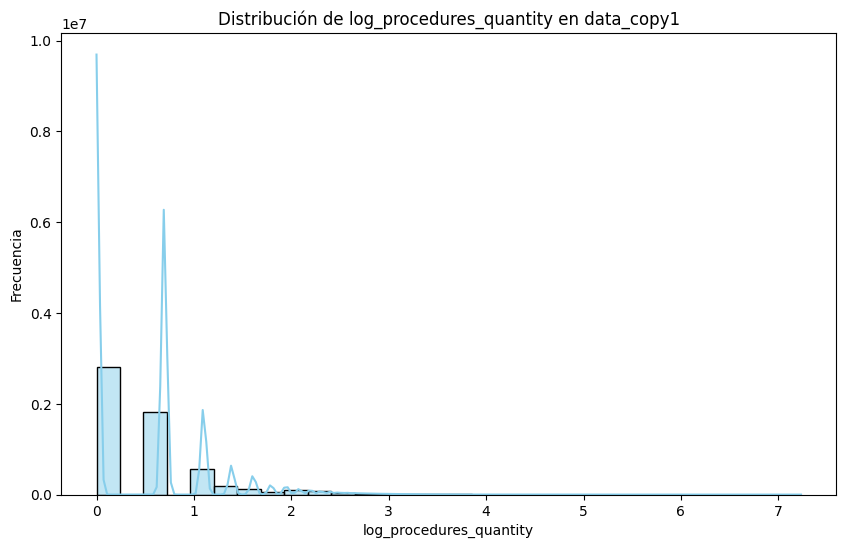

In [391]:
# Distribución de la nueva variable log_procedures_quantity

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el histograma y el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.histplot(data=data_copy1, x='log_procedures_quantity', bins=30, kde=True, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('log_procedures_quantity')
plt.ylabel('Frecuencia')
plt.title('Distribución de log_procedures_quantity en data_copy1')

In [392]:
lower_bound = data_copy1['procedures_quantity'].quantile(0.01)
upper_bound = data_copy1['procedures_quantity'].quantile(0.9)

# Filtrar los datos dentro de los límites
filtered_data = data_copy1[(data_copy1['procedures_quantity'] >= lower_bound) & 
                           (data_copy1['procedures_quantity'] <= upper_bound)]

Text(0.5, 1.0, 'Distribución de procedures_quantity en filtered_data')

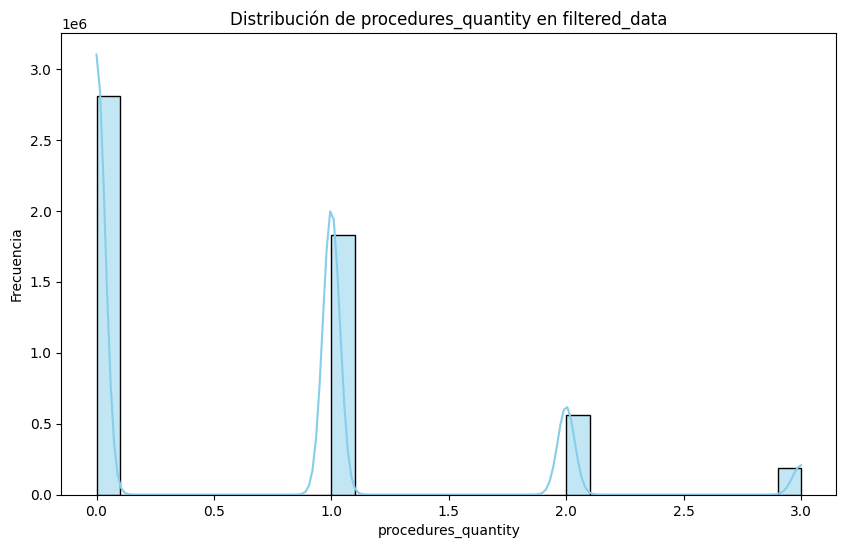

In [393]:
# Distribución de la variable procedures_quantity en filtered_data

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el histograma y el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='procedures_quantity', bins=30, kde=True, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('procedures_quantity')
plt.ylabel('Frecuencia')
plt.title('Distribución de procedures_quantity en filtered_data')

In [394]:
filtered_data

,cli_identification,cli_original_code,fullname,accounttype,countryname,institutiondescription,alchemydescription,include_date,has_courtarchive,birthdate,...,province_LIMON,province_PUNTARENAS,province_SAN JOSE,province_desconocido,ibm,iev,ic,expected,schooling,log_procedures_quantity
12,CR-P-1-0340-0590-CX,1-0340-0590,REINALDO RODRIGUEZ HERNANDEZ,Propia,COSTA RICA,CREDIX,Alquimia 008,2022-11-10 12:08:00,False,1946-03-07,...,0,0,1,0,0.65,0.85,0.80,0.94,0.65,0.69
15,CR-P-1-0352-0952-SB,1-0352-0952,RIVERA PADILLA DORA VIOLETA,Propia,COSTA RICA,SCOTIABANK,Alquimia 008,2023-05-25 10:16:00,False,1947-01-26,...,0,0,1,0,0.52,0.97,0.74,0.92,0.57,1.10
25,CR-P-1-0395-0227-PR,1-0395-0227,CARUZO LOPEZ DENIA,Propia,COSTA RICA,A-PROMERICA,Alquimia 130,2019-08-06 07:41:00,True,1951-05-21,...,0,0,1,0,0.61,0.91,0.77,0.95,0.59,0.00
27,CR-P-1-0367-0902-CX,1-0367-0902,SERGIO BONILLA SALAS,Propia,COSTA RICA,CREDIX,Alquimia 004,2019-07-03 15:28:00,False,1949-01-28,...,0,0,0,0,0.37,0.75,0.68,0.90,0.46,0.00
36,CR-P-1-0378-0177-PR,1-0378-0177,GARRO MOREIRA ABRAHAM,Propia,COSTA RICA,A-PROMERICA,Alquimia 034,2012-08-28 16:18:00,True,1949-12-02,...,0,0,1,0,0.73,0.83,0.78,0.91,0.64,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034912,CR-P-2-0704-0396-CX,2-0704-0396,KEVIN ADEMAR MATA MONGE,Propia,COSTA RICA,CREDIX,Alquimia 008,2022-11-10 12:08:00,False,1992-09-19,...,0,0,0,0,0.68,0.87,0.78,0.95,0.62,0.00
7034914,CR-P-2-0714-0059-PR,2-0714-0059,GUERRERO NUÑEZ KEVIN FRANCISCO,Propia,COSTA RICA,A-PROMERICA,Alquimia 112,2018-02-06 11:36:00,True,1993-05-02,...,0,1,0,0,0.53,0.81,0.73,0.95,0.52,0.69
7034915,CR-P-2-0718-0994-DV,2-0718-0994,ADRIAN ALONSO RAMIREZ MORA,Propia,COSTA RICA,DAVIVIENDA,Alquimia 001,2020-08-20 16:17:00,True,1993-11-03,...,0,0,0,0,0.63,0.86,0.78,0.98,0.58,0.69
7034916,CR-P-2-0720-0680-PR,2-0720-0680,CHAVARRIA FERNANDEZ ALEJANDRA MARIA,Propia,COSTA RICA,A-PROMERICA,Alquimia 133,2019-11-11 13:38:00,False,1993-12-20,...,0,0,0,0,0.69,0.88,0.80,0.96,0.63,0.00


In [395]:
# Otra posibilidad: Ponderación por rangos

from sklearn.preprocessing import RobustScaler
import pandas as pd

# Aplicar RobustScaler
robust_scaler = RobustScaler()

# Convertir a DataFrame (el doble corchete asegura que es un DataFrame, no una Serie)
data_copy1_int_robust = robust_scaler.fit_transform(data_copy1[['procedures_quantity']])

# Convertir a DataFrame escalado
data_copy1_int_robust_df = pd.DataFrame(data_copy1_int_robust, columns=['procedures_quantity'])

# Ver el DataFrame escalado
print(data_copy1_int_robust_df.head())

   procedures_quantity
0                 0.00
1                 1.00
2                 6.00
3                -1.00
4                -1.00


In [396]:
# Posible tratamiento de outliers en data_copy1['procedures_quantity']

# Se decide utilizar los percentiles 

# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1_procedures_quantity = data_copy1['procedures_quantity'].quantile(0.25)
Q3_procedures_quantity = data_copy1['procedures_quantity'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR_procedures_quantity = Q3_procedures_quantity - Q1_procedures_quantity

# Definir límites para los outliers
lower_bound = Q1_procedures_quantity - 3 * IQR_procedures_quantity
upper_bound = Q3_procedures_quantity + 3 * IQR_procedures_quantity

# Filtrar los outliers
data_copy2 = data_copy1[(data_copy1['procedures_quantity'] >= lower_bound) & (data_copy1['procedures_quantity'] <= upper_bound)]

# Calcular la media y desviación estándar de los valores válidos
mean_procedures_quantity = data_copy2['procedures_quantity'].mean()
std_procedures_quantity = data_copy2['procedures_quantity'].std()

# Guardar los parámetros en un diccionario
imputation_params_procedures_quantity = {
    'mean_procedures_quantity': mean_procedures_quantity,
    'std_procedures_quantity': std_procedures_quantity,
    'Q1_procedures_quantity': Q1_procedures_quantity,
    'Q3_procedures_quantity': Q3_procedures_quantity,
    'IQR_procedures_quantity': IQR_procedures_quantity
}

# Guardar el diccionario en un archivo joblib
joblib.dump(imputation_params_procedures_quantity, 'imputation_params_procedures_quantity.pkl')

# Calcular el porcentaje de datos restantes
percentage_remaining = (len(data_copy2) / len(data_copy1)) * 100

# Verificar la eliminación de outliers
print(data_copy2['procedures_quantity'].describe())
print(f"Cantidad original de filas: {len(data_copy1)}")
print(f"Cantidad de filas después de eliminar outliers: {len(data_copy2)}")
print(f"Porcentaje de datos restantes: {percentage_remaining:.2f}%")

count   5514944.00
mean          0.73
std           0.94
min           0.00
25%           0.00
50%           0.00
75%           1.00
max           4.00
Name: procedures_quantity, dtype: float64
Cantidad original de filas: 5828249
Cantidad de filas después de eliminar outliers: 5514944
Porcentaje de datos restantes: 94.62%


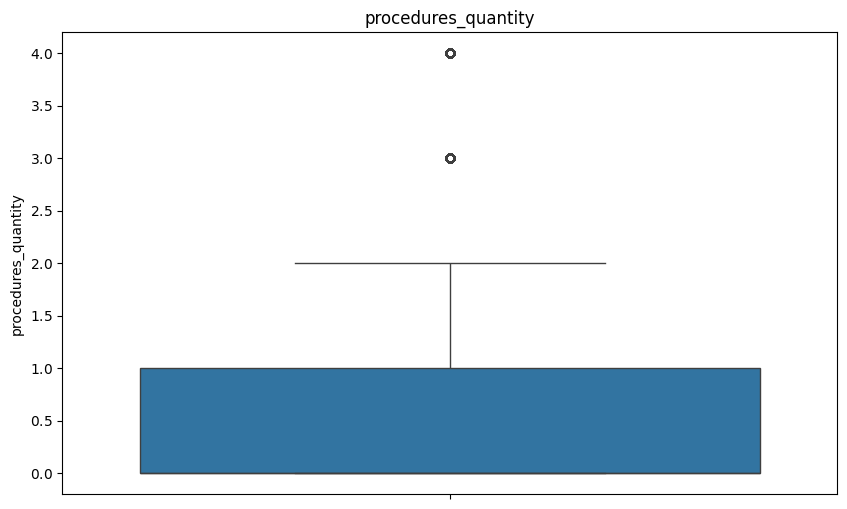

In [397]:
# Distribución de procedures_quantity

# Ajuste de la columna a tipo numérica
data_copy2['procedures_quantity'] = pd.to_numeric(data_copy2['procedures_quantity'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='procedures_quantity', data=data_copy2)
plt.title('procedures_quantity')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

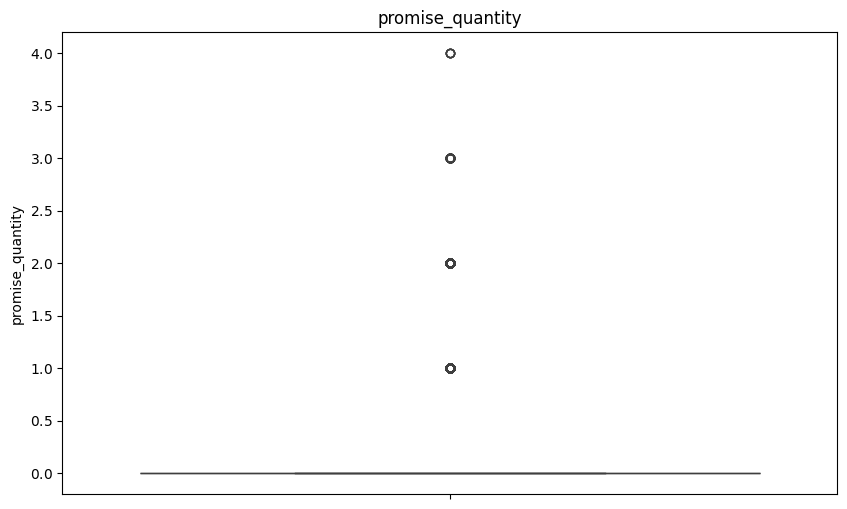

In [398]:
# promise_quantity

# Ajuste de la columna a tipo numérica
data_copy2['promise_quantity'] = pd.to_numeric(data_copy2['promise_quantity'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='promise_quantity', data=data_copy2[['promise_quantity']])
plt.title('promise_quantity')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

In [399]:
# Tratamiento de outliers en data_copy1['procedures_quantity']

lower_bound_procedures_quantity = data_copy1['procedures_quantity'].quantile(0.01)
upper_bound_procedures_quantity = data_copy1['procedures_quantity'].quantile(0.9999)

# Filtrar los datos dentro de los límites
data_copy2 = data_copy1[(data_copy1['procedures_quantity'] >= lower_bound_procedures_quantity) & 
                        (data_copy1['procedures_quantity'] <= upper_bound_procedures_quantity)]

data_copy2 ['procedures_quantity'] = data_copy1['procedures_quantity'].clip(lower=lower_bound_procedures_quantity, upper=upper_bound_procedures_quantity)

# Guardar los parámetros en un diccionario
imputation_params_procedures_quantity = {
    'lower_bound_procedures_quantity': lower_bound_procedures_quantity,
    'upper_bound_procedures_quantity': upper_bound_procedures_quantity
}

# Guardar el diccionario en un archivo joblib
joblib.dump(imputation_params_procedures_quantity, 'imputation_params_procedures_quantity.pkl')

# Calcular el porcentaje de datos restantes
percentage_remaining = (len(data_copy2) / len(data_copy1)) * 100

# Verificar la eliminación de outliers
print(data_copy2['procedures_quantity'].describe())
print(f"Cantidad original de filas: {len(data_copy1)}")
print(f"Cantidad de filas después de eliminar outliers: {len(data_copy2)}")
print(f"Porcentaje de datos restantes: {percentage_remaining:.2f}%")

count   5827676.00
mean          1.21
std           2.74
min           0.00
25%           0.00
50%           1.00
75%           1.00
max          71.00
Name: procedures_quantity, dtype: float64
Cantidad original de filas: 5828249
Cantidad de filas después de eliminar outliers: 5827676
Porcentaje de datos restantes: 99.99%


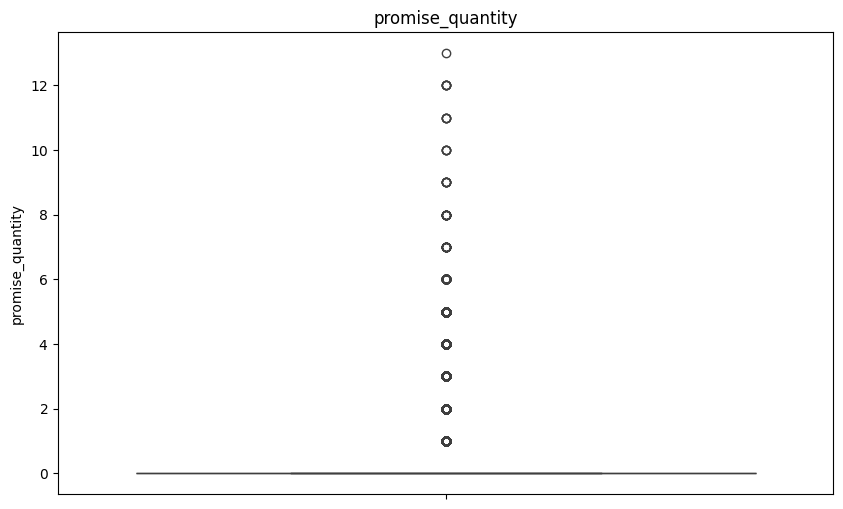

In [400]:
# promise_quantity

# Ajuste de la columna a tipo numérica
data_copy2['promise_quantity'] = pd.to_numeric(data_copy2['promise_quantity'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='promise_quantity', data=data_copy2[['promise_quantity']])
plt.title('promise_quantity')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

# Me parece que es mejor dejar la distribución tal cual está.

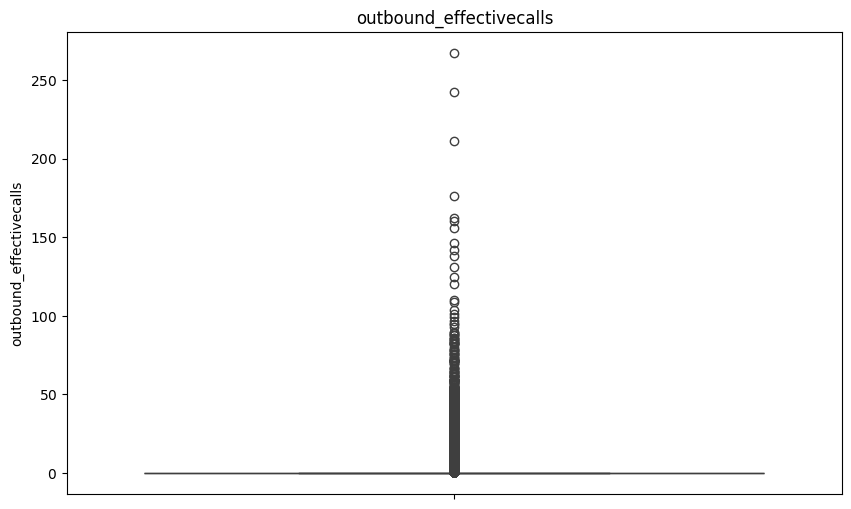

In [401]:
# outbound_effectivecalls

# Ajuste de la columna a tipo numérica
data_copy2['outbound_effectivecalls'] = pd.to_numeric(data_copy2['outbound_effectivecalls'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='outbound_effectivecalls', data=data_copy2[['outbound_effectivecalls']])
plt.title('outbound_effectivecalls')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

In [402]:
print(data_copy2['outbound_effectivecalls'].describe())

count   5827676.00
mean          0.49
std           1.49
min           0.00
25%           0.00
50%           0.00
75%           0.00
max         267.00
Name: outbound_effectivecalls, dtype: float64


In [403]:
# Posibilidad de tratamiento para outliers: Ponderación por rangos

from sklearn.preprocessing import RobustScaler
import pandas as pd

# Aplicar RobustScaler
robust_scaler = RobustScaler()

# Convertir a DataFrame (el doble corchete asegura que es un DataFrame, no una Serie)
data_copy2_outbound_effectivecalls_robust = robust_scaler.fit_transform(data_copy2[['outbound_effectivecalls']])

# Convertir a DataFrame escalado
data_copy2_outbound_effectivecalls_robust_df = pd.DataFrame(data_copy2_outbound_effectivecalls_robust, columns=['outbound_effectivecalls'])

# Ver el DataFrame escalado
print(data_copy2_outbound_effectivecalls_robust_df.head())

   outbound_effectivecalls
0                     0.00
1                     2.00
2                     0.00
3                     0.00
4                     1.00


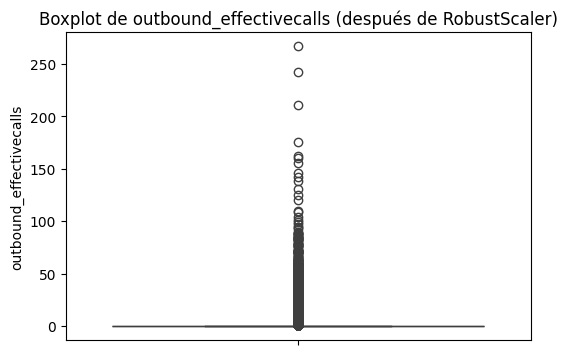

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear boxplot de la variable escalada
plt.figure(figsize=(6, 4))
sns.boxplot(data_copy2_outbound_effectivecalls_robust_df['outbound_effectivecalls'])
plt.title('Boxplot de outbound_effectivecalls (después de RobustScaler)')
plt.show()

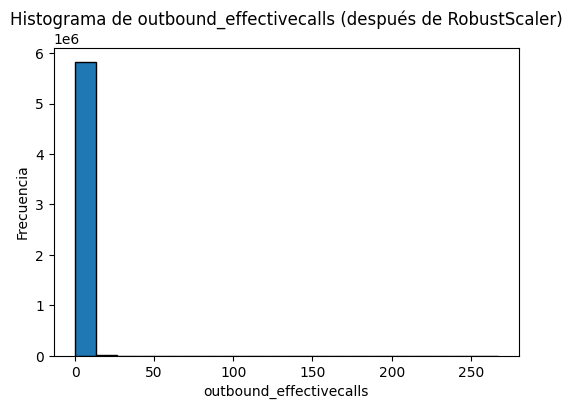

In [405]:
# Crear histograma de la variable escalada
plt.figure(figsize=(6, 4))
plt.hist(data_copy2_outbound_effectivecalls_robust_df['outbound_effectivecalls'], bins=20, edgecolor='black')
plt.title('Histograma de outbound_effectivecalls (después de RobustScaler)')
plt.xlabel('outbound_effectivecalls')
plt.ylabel('Frecuencia')
plt.show()

In [406]:
# Comparar los primeros valores antes y después del escalado
comparacion = pd.DataFrame({
    'Original': data_copy2['outbound_effectivecalls'].head(),
    'Escalado': data_copy2_outbound_effectivecalls_robust_df['outbound_effectivecalls'].head()
})
print(comparacion)

# Si el código parece estar dejando los datos iguales a los originales, es posible que:
# La variable no tenga outliers evidentes, o los valores ya estén distribuidos de manera homogénea, por lo que el RobustScaler no está realizando un cambio significativo.
# El rango intercuartílico (IQR) de los datos podría ser pequeño en comparación con los valores extremos. El RobustScaler se basa en los cuartiles para reducir el impacto de los outliers, y si los cuartiles están muy cercanos entre sí, los valores fuera de este rango no se verán muy afectados.

    Original  Escalado
0        NaN      0.00
1        NaN      2.00
2        NaN      0.00
3        NaN      0.00
4        NaN      1.00
12      0.00       NaN
15      2.00       NaN
17      0.00       NaN
25      0.00       NaN
27      1.00       NaN


In [407]:
# Tratamiento de outliers en data_copy2['outbound_effectivecalls']

lower_bound_outbound_effectivecalls = data_copy2['outbound_effectivecalls'].quantile(0.01)
upper_bound_outbound_effectivecalls = data_copy2['outbound_effectivecalls'].quantile(0.9999)

# Filtrar los datos dentro de los límites
data_copy3 = data_copy2[(data_copy2['outbound_effectivecalls'] >= lower_bound_outbound_effectivecalls) & 
                        (data_copy2['outbound_effectivecalls'] <= upper_bound_outbound_effectivecalls)]

data_copy3 ['outbound_effectivecalls'] = data_copy2['outbound_effectivecalls'].clip(lower=lower_bound_outbound_effectivecalls, upper=upper_bound_outbound_effectivecalls)

# Guardar los parámetros en un diccionario
imputation_params_outbound_effectivecalls = {
    'lower_bound_outbound_effectivecalls': lower_bound_outbound_effectivecalls,
    'upper_bound_outbound_effectivecalls': upper_bound_outbound_effectivecalls
}

# Guardar el diccionario en un archivo joblib
joblib.dump(imputation_params_outbound_effectivecalls, 'imputation_params_outbound_effectivecalls.pkl')

# Calcular el porcentaje de datos restantes
percentage_remaining = (len(data_copy3) / len(data_copy2)) * 100

# Verificar la eliminación de outliers
print(data_copy3['outbound_effectivecalls'].describe())
print(f"Cantidad original de filas: {len(data_copy2)}")
print(f"Cantidad de filas después de eliminar outliers: {len(data_copy3)}")
print(f"Porcentaje de datos restantes: {percentage_remaining:.2f}%")

count   5827134.00
mean          0.49
std           1.39
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          32.00
Name: outbound_effectivecalls, dtype: float64
Cantidad original de filas: 5827676
Cantidad de filas después de eliminar outliers: 5827134
Porcentaje de datos restantes: 99.99%


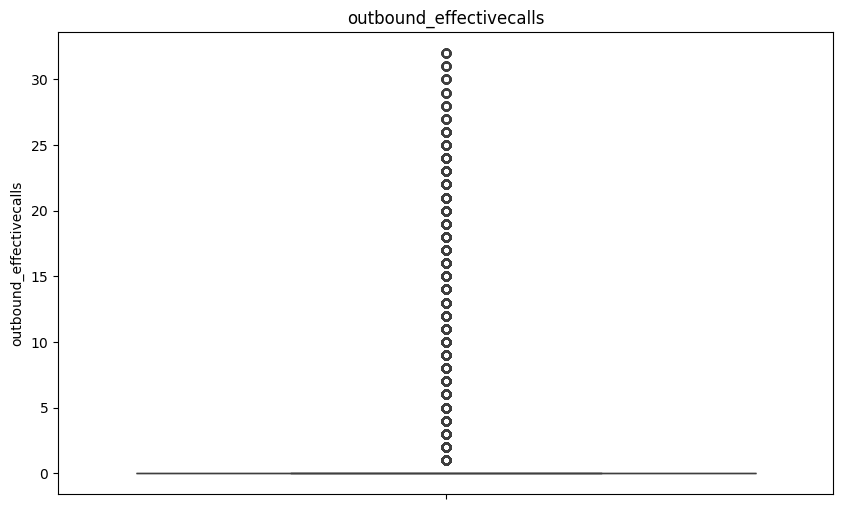

In [408]:
# outbound_effectivecalls

# Ajuste de la columna a tipo numérica
data_copy3['outbound_effectivecalls'] = pd.to_numeric(data_copy3['outbound_effectivecalls'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='outbound_effectivecalls', data=data_copy3[['outbound_effectivecalls']])
plt.title('outbound_effectivecalls')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

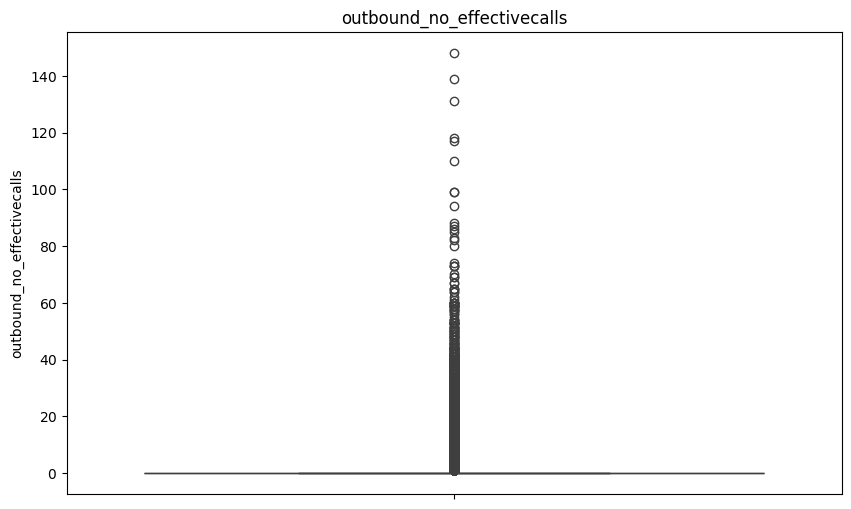

In [409]:
# outbound_no_effectivecalls

# Ajuste de la columna a tipo numérica
data_copy3['outbound_no_effectivecalls'] = pd.to_numeric(data_copy3['outbound_no_effectivecalls'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='outbound_no_effectivecalls', data=data_copy3[['outbound_no_effectivecalls']])
plt.title('outbound_no_effectivecalls')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

In [410]:
print(data_copy3['outbound_no_effectivecalls'].describe())

count   5827134.00
mean          0.46
std           1.41
min           0.00
25%           0.00
50%           0.00
75%           0.00
max         148.00
Name: outbound_no_effectivecalls, dtype: float64


In [411]:
# Tratamiento de outliers en data_copy2['outbound_no_effectivecalls']

lower_bound_outbound_no_effectivecalls = data_copy3['outbound_no_effectivecalls'].quantile(0.01)
upper_bound_outbound_no_effectivecalls = data_copy3['outbound_no_effectivecalls'].quantile(0.9999)

# Filtrar los datos dentro de los límites
data_copy4 = data_copy3[(data_copy3['outbound_no_effectivecalls'] >= lower_bound_outbound_no_effectivecalls) & 
                        (data_copy3['outbound_no_effectivecalls'] <= upper_bound_outbound_no_effectivecalls)]

data_copy4 ['outbound_no_effectivecalls'] = data_copy3['outbound_no_effectivecalls'].clip(lower=lower_bound_outbound_no_effectivecalls, upper=upper_bound_outbound_no_effectivecalls)

# Guardar los parámetros en un diccionario
imputation_params_outbound_no_effectivecalls = {
    'lower_bound_outbound_no_effectivecalls': lower_bound_outbound_no_effectivecalls,
    'upper_bound_outbound_no_effectivecallss': upper_bound_outbound_no_effectivecalls
}

# Guardar el diccionario en un archivo joblib
joblib.dump(imputation_params_outbound_no_effectivecalls, 'imputation_params_outbound_no_effectivecalls.pkl')

# Calcular el porcentaje de datos restantes
percentage_remaining = (len(data_copy4) / len(data_copy3)) * 100

# Verificar la eliminación de outliers
print(data_copy4['outbound_no_effectivecalls'].describe())
print(f"Cantidad original de filas: {len(data_copy3)}")
print(f"Cantidad de filas después de eliminar outliers: {len(data_copy4)}")
print(f"Porcentaje de datos restantes: {percentage_remaining:.2f}%")

count   5826601.00
mean          0.46
std           1.36
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          28.00
Name: outbound_no_effectivecalls, dtype: float64
Cantidad original de filas: 5827134
Cantidad de filas después de eliminar outliers: 5826601
Porcentaje de datos restantes: 99.99%


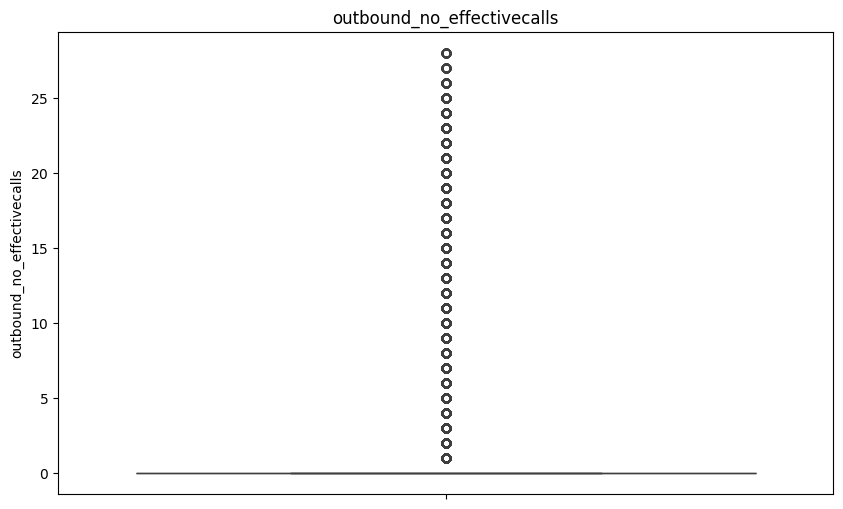

In [412]:
# outbound_no_effectivecalls

# Ajuste de la columna a tipo numérica
data_copy4['outbound_no_effectivecalls'] = pd.to_numeric(data_copy4['outbound_no_effectivecalls'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='outbound_no_effectivecalls', data=data_copy4[['outbound_no_effectivecalls']])
plt.title('outbound_no_effectivecalls')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

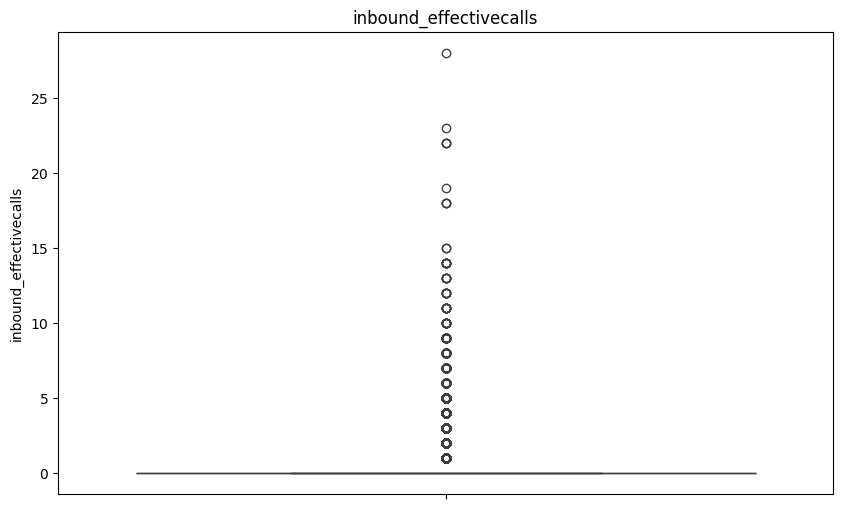

In [413]:
# inbound_effectivecalls

# Ajuste de la columna a tipo numérica
data_copy4['inbound_effectivecalls'] = pd.to_numeric(data_copy4['inbound_effectivecalls'], errors='coerce')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='inbound_effectivecalls', data=data_copy4[['inbound_effectivecalls']])
plt.title('inbound_effectivecalls')

# Desactivar la notación científica en el eje y
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='y')

plt.show()

In [414]:
# Tenencia en procedures_quantity

import numpy as np
import pandas as pd

# Crear la nueva variable dicotómica
data_copy4['tenencia_procedures'] = np.where(data_copy4['procedures_quantity'] == 0, 0, 1)

## Mostrar las primeras filas para verificar
#print(data_copy4[['procedures_quantity', 'tenencia_procedures']].head())

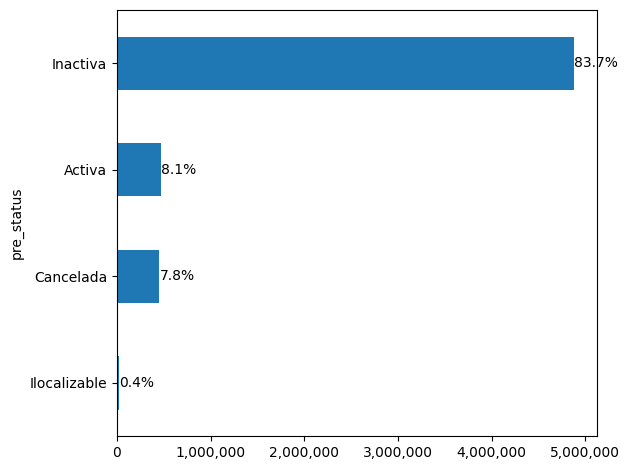

In [415]:
# pre_status

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Frecuencia de cada categoría en 'pre_status'
pre_status_counts = data_copy4['pre_status'].value_counts()

# Calcular los porcentajes de cada categoría
pre_status_percentages = (pre_status_counts / pre_status_counts.sum()) * 100

# Gráfico de barras horizontales
fig, ax = plt.subplots()
bars = pre_status_counts.plot(kind='barh', ax=ax)

# Añadir etiquetas de porcentajes a la derecha de las barras
for bar, percentage in zip(bars.patches, pre_status_percentages):
    # Obtener la posición y ancho de la barra
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    
    # Mostrar los porcentajes a la derecha de la barra
    ax.text(x + 1, y, f'{percentage:.1f}%', va='center', ha='left', fontsize=10)

# Invertir el orden para mostrar de mayor a menor en la gráfica horizontal
ax.invert_yaxis()

# Formatear el eje x para mostrar números completos en lugar de notación científica
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Ajustar el gráfico para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

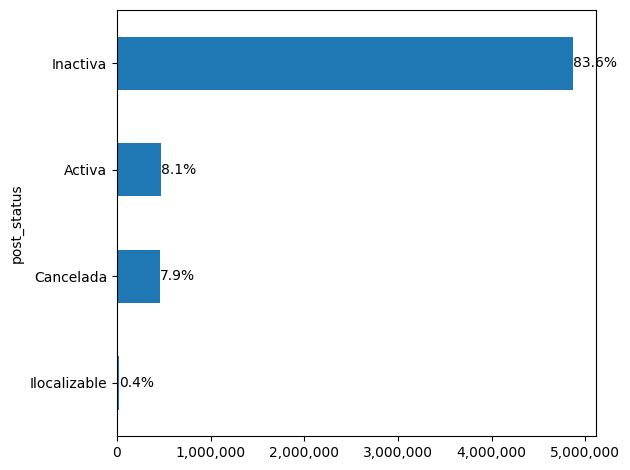

In [416]:
# post_status

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Frecuencia de cada categoría en 'post_status'
post_status_counts = data_copy4['post_status'].value_counts()

# Calcular los porcentajes de cada categoría
post_status_percentages = (post_status_counts / post_status_counts.sum()) * 100

# Gráfico de barras horizontales
fig, ax = plt.subplots()
bars = post_status_counts.plot(kind='barh', ax=ax)

# Añadir etiquetas de porcentajes a la derecha de las barras
for bar, percentage in zip(bars.patches, post_status_percentages):
    # Obtener la posición y ancho de la barra
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    
    # Mostrar los porcentajes a la derecha de la barra
    ax.text(x + 1, y, f'{percentage:.1f}%', va='center', ha='left', fontsize=10)

# Invertir el orden para mostrar de mayor a menor en la gráfica horizontal
ax.invert_yaxis()

# Formatear el eje x para mostrar números completos en lugar de notación científica
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Ajustar el gráfico para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [417]:
# Comparación entre las variables pre_status y post_status para ver si son iguales

are_equal = data_copy4['pre_status'].equals(data_copy4['post_status'])
print(f"¿Las columnas son iguales? {are_equal}")

¿Las columnas son iguales? False


In [418]:
# Creación de la variable tenencia de gestiones

import numpy as np
import pandas as pd

# Crear la nueva variable dicotómica
data_copy4['tenencia_procedures'] = np.where(data_copy4['procedures_quantity'] == 0, 0, 1)

In [419]:
# Creación de una variable respuesta dicotómica llamada posible_acuerdo, que sea 1 cuando se cumplan las siguientes condiciones:
# pre_status es indiferente (no afecta la condición)
# post_status es "Activa"
# tenencia_procedures es 1
# 0 para todo lo demás

# Crear la nueva variable respuesta dicotómica 'posible_acuerdo'
data_copy4['posible_acuerdo'] = np.where((data_copy4['post_status'] == 'Activa') & (data_copy4['tenencia_procedures'] == 1), 1, 0)

# Mostrar las primeras filas para verificar
print(data_copy4[['pre_status', 'post_status', 'tenencia_procedures', 'posible_acuerdo']].head())


   pre_status post_status  tenencia_procedures  posible_acuerdo
12   Inactiva    Inactiva                    1                0
15   Inactiva    Inactiva                    1                0
17     Activa      Activa                    1                1
25   Inactiva    Inactiva                    0                0
27   Inactiva    Inactiva                    0                0


In [420]:
data_copy4.columns

Index(['cli_identification', 'cli_original_code', 'fullname', 'accounttype',
       'countryname', 'institutiondescription', 'alchemydescription',
       'include_date', 'has_courtarchive', 'birthdate',
       ...
       'province_SAN JOSE', 'province_desconocido', 'ibm', 'iev', 'ic',
       'expected', 'schooling', 'log_procedures_quantity',
       'tenencia_procedures', 'posible_acuerdo'],
      dtype='object', length=103)

In [441]:
# # Se guarda el dataframe en un archivo parquet para ser consumido más fácilmente

# data_copy4.to_parquet('C:/Users/gurenab/Documents/Acuerdos_pago/data_24092024.parquet')

# MODELO LASSO

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Configurar pandas para que no use la notación científica
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# Carga de la data

import pandas as pd

data_24092024 = pd.read_parquet('C:/Users/gurenab/Documents/Acuerdos_pago/data_24092024.parquet')

In [ ]:
data_24092024

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Paso 1: Selección de las columnas
data_modelo = data_24092024.loc[:, [
    'cli_identification', 'fullname',
    'age', 'gender', 'civilstatus', 'jobtype', 'jobcompany_status',
    'children', 'vehicules', 'ownerships',
    'has_courtarchive', 
    'institutiondescription', 'alchemydescription',
    'firstperiodsalary', 'secondperiodsalary', 'lastsalary',
    'province', 
    'ipm', 'incidence', 'poorpeople_quantity', 'deprivation_intensity', 'severity', 'vulnerability', 'inequality', 
    'contribution_deprivation_education', 'contribution_deprivation_dwelling', 'contribution_deprivation_health', 'contribution_deprivation_social',
    'population', 'idgas', 'ibm_women', 'ibm_men', 'iev_women', 'iev_men', 'ic_women', 'ic_men', 'expected_women', 'expected_men', 'schooling_women', 'schooling_men',
    'debtormaturity_inmonth',
    'procedures_quantity', 'promise_quantity',
    'outbound_effectivecalls', 'outbound_no_effectivecalls', 'inbound_effectivecalls', 'inbound_no_effectivecalls', 
    'account_quantity', 'active_accounts', 'inactive_accounts', 'untraceable_accounts', 'cancelled_accounts',
    'yearmonthfilternumber',
    'posible_acuerdo'
]]

#data_modelo.info()

# Paso 2: Separar las variables predictoras y la variable respuesta
X = data_modelo.drop(columns=['posible_acuerdo', 'cli_identification', 'fullname', 'province', 'yearmonthfilternumber'])  # Eliminar variable respuesta, de identificación y de columnas no necesarias
y = data_modelo['posible_acuerdo']  # Variable objetivo

# Paso 3: Dividir las variables categóricas y numéricas
categorical_columns = X.select_dtypes(include=['category', 'object']).columns.tolist()
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Codificación One-Hot de las columnas categóricas
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  # drop_first=True para evitar multicolinealidad

# Paso 4: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Paso 5: Escalar solo las variables numéricas
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])  # Escalar las variables numéricas
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Paso 6: Entrenar el modelo Lasso
lasso = Lasso(alpha=0.1)  # Ajustar el valor de alpha según sea necesario
lasso.fit(X_train_scaled, y_train)

# Paso 7: Predecir y evaluar el modelo
y_pred_train = lasso.predict(X_train_scaled)
y_pred_train_binary = np.where(y_pred_train >= 0.5, 1, 0)  # Convertir las predicciones a 0 o 1

y_pred_test = lasso.predict(X_test_scaled)
y_pred_test_binary = np.where(y_pred_test >= 0.5, 1, 0)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_test_binary)
conf_matrix = confusion_matrix(y_test, y_pred_test_binary)
class_report = classification_report(y_test, y_pred_test_binary)

# Mostrar los resultados
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Mostrar los coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X_encoded.columns,
    'Coeficiente': lasso.coef_
}).sort_values(by='Coeficiente', ascending=False)

print("Coeficientes del modelo Lasso:")
print(coeficientes)


Accuracy: 0.95
Confusion Matrix:
[[1104502      42]
 [  58653    2124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97   1104544
           1       0.98      0.03      0.07     60777

    accuracy                           0.95   1165321
   macro avg       0.97      0.52      0.52   1165321
weighted avg       0.95      0.95      0.93   1165321

Coeficientes del modelo Lasso:
                                          Variable  Coeficiente
28                                promise_quantity         0.04
34                                 active_accounts         0.04
0                                              age        -0.00
411  firstperiodsalary_Entre ₡ 3325000 y ₡ 3350000        -0.00
405  firstperiodsalary_Entre ₡ 3200000 y ₡ 3225000        -0.00
..                                             ...          ...
206                alchemydescription_Alquimia 126         0.00
207                alchemydescripti

# PCA

In [13]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Configurar pandas para que no use la notación científica
pd.options.display.float_format = '{:.2f}'.format

In [14]:
# Carga de la data

import pandas as pd

data_24092024 = pd.read_parquet('C:/Users/gurenab/Documents/Acuerdos_pago/data_24092024.parquet')

In [ ]:
data_24092024

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Paso 1: Selección de las columnas relevantes
data_pca_columns = [
    'age', 'gender', 'civilstatus', 'jobtype', 'jobcompany_status',
    'children', 'vehicules', 'ownerships',
    'has_courtarchive', 
    'institutiondescription', #'alchemydescription',
    #'firstperiodsalary', 'secondperiodsalary', 
    'lastsalary',
    'province', 
    'ipm', 'incidence', 'poorpeople_quantity', 'deprivation_intensity', 
    'severity', 'vulnerability', 'inequality', 
    'contribution_deprivation_education', 'contribution_deprivation_dwelling', 'contribution_deprivation_health', 'contribution_deprivation_social',
    'population', 'idgas', 
    'ibm_women', 'ibm_men', 
    'iev_women', 'iev_men', 
    'ic_women', 'ic_men', 
    'expected_women', 'expected_men', 
    'schooling_women', 'schooling_men',
    'debtormaturity_inmonth', 'procedures_quantity', 'promise_quantity', 
    'outbound_effectivecalls', 'outbound_no_effectivecalls', 
    'inbound_effectivecalls', 'inbound_no_effectivecalls', 
    'account_quantity', 'active_accounts', 'inactive_accounts', 
    'untraceable_accounts', 'cancelled_accounts'
    #'yearmonthfilternumber'
]

# Paso 2: Seleccionar las columnas relevantes del dataframe
X = data_24092024[data_pca_columns].copy()

# Paso 3: Identificación de variables categóricas y numéricas
variables_categoricas = X.select_dtypes(include=['category', 'object']).columns.tolist()
variables_numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Paso 4: Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),
        ('cat', OneHotEncoder(sparse_output=False), variables_categoricas)  # Convertir a array denso
    ]
)

# Paso 5: Pipeline para preprocesamiento
pipeline_preprocessing = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Paso 6: Manejo de valores faltantes antes de aplicar el pipeline
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

# Convertir el numpy array devuelto por SimpleImputer de nuevo en un DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Paso 7: Aplicar el preprocesamiento antes de PCA
X_preprocessed = pipeline_preprocessing.fit_transform(X_imputed_df)

# Paso 8: Determinar el número de componentes para explicar el 95% de la varianza usando PCA regular
pca_temp = PCA(n_components=0.95)
pca_temp.fit(X_preprocessed)

# Obtener el número de componentes que explican el 95% de la varianza
n_componentes_95 = pca_temp.n_components_
print(f"Número de componentes necesarios para explicar el 95% de la varianza: {n_componentes_95}")

# Paso 9: Pipeline para preprocesamiento y PCA con IncrementalPCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', IncrementalPCA(n_components=n_componentes_95))  # Número exacto de componentes
])

# Paso 10: Aplicar el pipeline completo (preprocesamiento + PCA)
X_pca = pipeline.fit_transform(X_imputed_df)

# Paso 11: Obtener la varianza explicada acumulada por los componentes principales
pca_model = pipeline.named_steps['pca']
varianza_explicada = pca_model.explained_variance_ratio_.cumsum()

# Mostrar la varianza explicada acumulada
print("Varianza explicada acumulada por los componentes principales:")
print(varianza_explicada)

Número de componentes necesarios para explicar el 95% de la varianza: 31
Varianza explicada acumulada por los componentes principales:
[0.24587669 0.34074837 0.40028951 0.44832846 0.49197058 0.53176167
 0.56669112 0.59887157 0.62938491 0.65794438 0.68499721 0.71034467
 0.73473634 0.75602354 0.77581932 0.7943066  0.81230696 0.82785631
 0.84213031 0.85536562 0.8682266  0.88015216 0.89142976 0.90215953
 0.9118496  0.92047338 0.92886269 0.93617534 0.9430471  0.94945119
 0.95565093]


In [16]:
# Obtener las cargas de los componentes principales

# 1. Obtener los componentes principales
componentes_principales = pca_model.components_

# 2. Crear un DataFrame para visualizar las cargas de los componentes
cargas_df = pd.DataFrame(componentes_principales, columns=pipeline.named_steps['preprocessor'].get_feature_names_out(), index=[f'Componente {i+1}' for i in range(componentes_principales.shape[0])])

# 3. Mostrar las cargas
print("Cargas de los componentes principales:")
print(cargas_df)

Cargas de los componentes principales:
               num__age  num__lastsalary  num__ipm  num__incidence  \
Componente 1       0.01            -0.01      0.28            0.28   
Componente 2       0.00             0.02     -0.12           -0.12   
Componente 3      -0.07             0.13      0.01            0.01   
Componente 4      -0.07            -0.06      0.01            0.02   
Componente 5       0.04             0.03      0.06            0.01   
Componente 6      -0.02            -0.02      0.15            0.19   
Componente 7       0.02             0.01      0.00            0.00   
Componente 8      -0.32             0.13      0.01            0.01   
Componente 9       0.59             0.05     -0.06           -0.07   
Componente 10     -0.30             0.06     -0.11           -0.13   
Componente 11      0.03             0.66      0.01            0.01   
Componente 12      0.02             0.12      0.05            0.04   
Componente 13     -0.15            -0.01     -0.00 

In [17]:
# Ordenar las variables por su contribución en cada componente principal

# Crear un DataFrame para almacenar los top 5 de cada componente
top_contribuciones = pd.DataFrame()

for componente in cargas_df.index:
    # Ordenar por las contribuciones absolutas en cada componente
    contribuciones_ordenadas = cargas_df.loc[componente].abs().sort_values(ascending=False)
    
    # Obtener el top 5 de variables que más contribuyen
    top_5 = contribuciones_ordenadas.head(5)
    
    # Guardar en un DataFrame con el nombre del componente
    top_contribuciones[componente] = top_5.index

# Mostrar las variables que más contribuyen a cada componente
print("Top 5 variables que más contribuyen a cada componente principal:")
print(top_contribuciones)

Top 5 variables que más contribuyen a cada componente principal:
                 Componente 1              Componente 2  \
0                    num__ipm           num__population   
1  num__deprivation_intensity  num__poorpeople_quantity   
2                 num__ic_men       num__expected_women   
3              num__incidence         num__expected_men   
4             num__inequality                num__idgas   

                   Componente 3                     Componente 4  \
0          num__active_accounts           num__inactive_accounts   
1         num__promise_quantity          num__cancelled_accounts   
2      num__procedures_quantity     num__outbound_effectivecalls   
3        num__inactive_accounts  num__outbound_no_effectivecalls   
4  num__outbound_effectivecalls            num__account_quantity   

                              Componente 5  \
0     num__contribution_deprivation_health   
1                             num__iev_men   
2               num__deprivation_

# MODELO LASSO CON LOS COMPONENTES PRINCIPALES

In [26]:
# Paso 12: Seleccionar los componentes hasta acumular el 80% de la varianza
umbral_varianza = 0.80
componentes_seleccionados = (varianza_explicada <= umbral_varianza).sum()
print(f"Componentes seleccionados que explican hasta el 80% de la varianza: {componentes_seleccionados}")

# Paso 13: Obtener las cargas de los componentes principales seleccionados
componentes_principales = pca_model.components_[:componentes_seleccionados]

# Obtener los nombres de las columnas transformadas por el preprocesador
nombres_columnas_transformadas = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Crear un DataFrame para visualizar las cargas de los componentes seleccionados
cargas_df = pd.DataFrame(componentes_principales, 
                         columns=nombres_columnas_transformadas, 
                         index=[f'Componente {i+1}' for i in range(componentes_seleccionados)])

# Paso 14: Seleccionar las columnas más importantes en función de un umbral
umbral_importancia = 0.01  # Ajusta este umbral según la importancia
columnas_seleccionadas = []

for componente in cargas_df.index:
    # Filtrar las variables por contribución significativa
    contribuciones_significativas = cargas_df.loc[componente][cargas_df.loc[componente].abs() > umbral_importancia]
    columnas_seleccionadas.extend(contribuciones_significativas.index)

# Eliminar duplicados de las columnas seleccionadas
columnas_seleccionadas = list(set(columnas_seleccionadas))

# Mostrar las columnas seleccionadas
print(f"Columnas seleccionadas después de aplicar el umbral de importancia: {len(columnas_seleccionadas)} variables")
print(columnas_seleccionadas)

# Paso 15 (Depuración): Verificar las columnas disponibles en X_imputed_df
columnas_disponibles = X_imputed_df.columns

# Paso 16: Filtrar las columnas seleccionadas que estén realmente disponibles en X_imputed_df
columnas_validas = [col for col in columnas_seleccionadas if col in columnas_disponibles]

# Mostrar las columnas seleccionadas que están presentes
print(f"Columnas seleccionadas válidas: {len(columnas_validas)} variables")
print(columnas_validas)

# Mostrar las columnas que no se encontraron en el DataFrame
columnas_faltantes = [col for col in columnas_seleccionadas if col not in columnas_disponibles]
if columnas_faltantes:
    print(f"Advertencia: Las siguientes columnas no se encontraron en el DataFrame: {columnas_faltantes}")

# Ahora seleccionar solo las columnas válidas en X_imputed_df
X_lasso_seleccionado = X_imputed_df[columnas_validas]

# Mostrar un vistazo de los datos seleccionados
print("Datos preparados para correr el modelo Lasso:")
print(X_lasso_seleccionado.head())

Componentes seleccionados que explican hasta el 80% de la varianza: 16
Columnas seleccionadas después de aplicar el umbral de importancia: 67 variables
['num__outbound_effectivecalls', 'cat__jobtype_PUBLICO', 'cat__province_PUNTARENAS', 'cat__institutiondescription_DAVIVIENDA', 'cat__institutiondescription_SERVIVALORES', 'cat__civilstatus_SOLTERO', 'num__age', 'num__procedures_quantity', 'num__expected_men', 'num__active_accounts', 'num__cancelled_accounts', 'num__incidence', 'cat__institutiondescription_SCOTIABANK', 'cat__vehicules_sin_carros', 'num__iev_men', 'num__ic_men', 'num__ibm_women', 'cat__children_sin_hijos', 'num__population', 'num__idgas', 'cat__province_GUANACASTE', 'cat__ownerships_con_propiedades', 'num__inbound_effectivecalls', 'num__deprivation_intensity', 'cat__ownerships_sin_propiedades', 'cat__institutiondescription_E-CREDIT', 'num__contribution_deprivation_dwelling', 'num__lastsalary', 'cat__jobtype_PRIVADO', 'cat__institutiondescription_GRUPO GENTE', 'num__vulner

In [29]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Supongamos que ya tienes los componentes principales en X_pca y la variable objetivo y

# Paso 1: Definir la variable objetivo (y)
y = data_24092024['posible_acuerdo']

# Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Paso 3: Crear y ajustar el modelo Lasso
lasso_model = Lasso(alpha=0.1)  # Ajusta el valor de alpha según sea necesario
lasso_model.fit(X_train, y_train)

# Paso 4: Hacer predicciones sobre el conjunto de prueba
y_pred = lasso_model.predict(X_test)

# Paso 5: Evaluar el rendimiento del modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE del modelo Lasso: {rmse:.4f}")

# Paso 6: Obtener los coeficientes del modelo
lasso_coefs = lasso_model.coef_

# Mostrar las variables importantes (con coeficientes diferentes de 0)
variables_importantes = [(i, coef) for i, coef in enumerate(lasso_coefs) if coef != 0]
print(f"Variables importantes seleccionadas por Lasso (coeficiente != 0): {len(variables_importantes)} variables")
for index, coef in variables_importantes:
    print(f"Componente {index}: {coef:.4f}")

RMSE del modelo Lasso: 0.1491
Variables importantes seleccionadas por Lasso (coeficiente != 0): 1 variables
Componente 2: 0.0719


In [33]:
# Ajuste del parámetro alpha para el modelo Lasso

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Paso 1: Definir un rango de valores de alpha
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Paso 2: Configurar el modelo Lasso con búsqueda de hiperparámetros
lasso_model = Lasso()

# Paso 3: Configurar la búsqueda en cuadrícula con validación cruzada (se prueba con 5 folds, en primera instancia)
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Paso 4: Ajustar el modelo con GridSearchCV usando los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Paso 5: Obtener el mejor valor de alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor valor de alpha: {best_alpha}")

# Paso 6: Evaluar el rendimiento del modelo con el mejor alpha
best_lasso_model = grid_search.best_estimator_
y_pred = best_lasso_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE con el mejor alpha: {rmse:.4f}")

Mejor valor de alpha: 0.001
RMSE con el mejor alpha: 0.1185


In [34]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import numpy as np

# Paso 1: Definir la variable objetivo (y)
y = data_24092024['posible_acuerdo']

# Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Paso 3: Crear y ajustar el modelo Lasso
lasso_model = Lasso(alpha=best_alpha)  # Ajusta el valor de alpha según se había obtenido anteriormente como el mejor
lasso_model.fit(X_train, y_train)

# Paso 4: Hacer predicciones sobre el conjunto de prueba
y_pred = lasso_model.predict(X_test)

# Paso 5: Evaluar el rendimiento del modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE del modelo Lasso: {rmse:.4f}")

# Paso 6: Obtener los coeficientes del modelo
lasso_coefs = lasso_model.coef_

# Mostrar las variables importantes (con coeficientes diferentes de 0)
variables_importantes = [(i, coef) for i, coef in enumerate(lasso_coefs) if coef != 0]
print(f"Variables importantes seleccionadas por Lasso (coeficiente != 0): {len(variables_importantes)} variables")

# Paso 7: Obtener los nombres de las variables originales a partir de los componentes de PCA
pca = PCA()  # Crea una instancia de PCA para acceder a los componentes
pca.fit(X_preprocessed)  # Ajusta el PCA a los datos preprocesados

# Obtener la matriz de componentes
components_matrix = pca.components_

# Obtener los nombres de las variables originales
original_variable_names = data_pca_columns  # Asumiendo que tienes esta lista de nombres de las variables

# Paso 8: Mapeo de componentes a variables originales
for index, coef in variables_importantes:
    print(f"Componente {index}: {coef:.4f}")
    
    # Obtener la importancia de cada variable original en este componente
    variable_importance = components_matrix[index]  # Importancia de las variables en el componente seleccionado
    
    # Mostrar cada variable original y su peso en el componente
    print(f"Importancia de variables originales para el Componente {index}:")
    for original_index in range(len(original_variable_names)):
        # Multiplica por el coeficiente del modelo Lasso para ver el impacto
        importance = variable_importance[original_index] * coef
        print(f" - Variable original: {original_variable_names[original_index]}, Importancia: {importance:.4f}")

RMSE del modelo Lasso: 0.1185
Variables importantes seleccionadas por Lasso (coeficiente != 0): 17 variables
Componente 0: -0.0014
Importancia de variables originales para el Componente 0:
 - Variable original: age, Importancia: -0.0000
 - Variable original: gender, Importancia: 0.0000
 - Variable original: civilstatus, Importancia: -0.0004
 - Variable original: jobtype, Importancia: -0.0004
 - Variable original: jobcompany_status, Importancia: -0.0002
 - Variable original: children, Importancia: -0.0004
 - Variable original: vehicules, Importancia: -0.0004
 - Variable original: ownerships, Importancia: -0.0002
 - Variable original: has_courtarchive, Importancia: -0.0004
 - Variable original: institutiondescription, Importancia: 0.0003
 - Variable original: lastsalary, Importancia: -0.0000
 - Variable original: province, Importancia: -0.0004
 - Variable original: ipm, Importancia: 0.0002
 - Variable original: incidence, Importancia: -0.0001
 - Variable original: poorpeople_quantity, Im

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Crear el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el rendimiento
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"RMSE del modelo Random Forest: {rmse_rf:.4f}")

RMSE del modelo Random Forest: 0.0586


# Gradient Boosting Machines (GBM)

In [36]:
from xgboost import XGBRegressor

# Crear el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
xgb_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el rendimiento
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f"RMSE del modelo XGBoost: {rmse_xgb:.4f}")

RMSE del modelo XGBoost: 0.0593


# Support Vector Machines (SVM)

In [37]:
from sklearn.svm import SVR

# Crear el modelo SVR
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Ajustar el modelo a los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el rendimiento
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
print(f"RMSE del modelo SVM: {rmse_svm:.4f}")